In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

Business Understanding The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
app_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_data.csv')
app_df.head()

# reading the application csv file and creating dataframe and printing  first 5 records

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
pre_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/previous_application.csv')
pre_df.head()

# reading the previous application csv file and creating dataframe and printing  first 5 records

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [6]:
info=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/columns_description.csv', encoding = 'latin-1')



In [7]:
info

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli



---


Data Understanding

---



In [8]:
app_df.shape

# understanding the shape of app_df

(307511, 122)

In [9]:
app_df.dtypes

# understanding the columns and datatypes of app_df

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
app_df.describe()

# understanding the overall data of app_df

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
pre_df.shape

# understanding the shape of pre_df

(1670214, 37)

In [13]:
pre_df.dtypes

# understanding the datatypes of columns of pre_df

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [14]:
pre_df.describe()

# describing the pre_df data

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# Data Cleaning

In [15]:
#Understanding the number of nulls in the application dataset
app_df.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
# Nulls by percentage
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [17]:
# Nulls in the previous application dataset
pre_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [18]:
# Nulls by percentage
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [19]:
empty=app_df.isnull().sum()/len(app_df)*100
empty=empty[empty>35]
empty
# The columns with null values more than 35%
# filtering the columns on basis on null value so that outputs the columns with null values more than 35% so become easy to process

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [20]:
len(empty)
#

49

In [21]:
# Removaing the columns with null values of more than 35%
empty = list(empty[empty.values>=35.0].index)
app_df.drop(labels=empty,axis=1,inplace=True)

In [22]:
# checking the columns with their null perc.
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [23]:

app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [24]:
# checking the structure of app_df
app_df.shape

(307511, 73)

In [25]:
# checking the columns with null values more than 35%
empty1=pre_df.isnull().sum()/len(pre_df)*100
empty1=empty1[empty1>35]
empty1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [26]:
# there are 11 columns with null values more than 35%
len(empty1)

11

In [27]:
# Removaing the columns with null values of more than 35%
empty1 = list(empty1[empty1.values>=35.0].index)
pre_df.drop(labels=empty1,axis=1,inplace=True)

In [28]:
# again checking the columns with null values
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [29]:
pre_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [30]:
pre_df.shape

(1670214, 26)

**Operations on application dataframe(app_df)**

In [31]:
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100
# the output give the the rows have Cash loans as the value for NAME_CONTRACT_TYPE, and 10% have Revolving loans

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [32]:
app_df.CODE_GENDER.unique()
# give the gender

array(['M', 'F', 'XNA'], dtype=object)

In [33]:
app_df.CODE_GENDER.value_counts()
# count of unique gender

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [34]:
app_df[app_df.CODE_GENDER=='XNA']
# shows rows with the rows with didn't specify the gender

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657                  NaN              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [35]:
app_df.drop(app_df[app_df.CODE_GENDER=='XNA'].index,inplace=True)
# dropping the rows with gender not mentioned

In [36]:
# again checking the structure of app_df
app_df.shape

(307507, 73)

In [37]:
app_df.FLAG_OWN_CAR.value_counts()
# checking the rows with the person who owns car or not

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [38]:
app_df.NAME_CONTRACT_TYPE.value_counts()
# showing the rows with who have cash loans and revolving loans

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

In [39]:
app_df.FLAG_OWN_REALTY.value_counts()
# This command counts the number of rows with the person who owns realty or not.

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [40]:
app_df.CNT_CHILDREN.describe()
# checking the count of childern

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

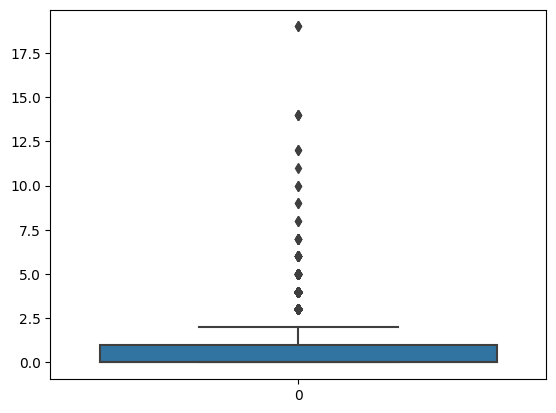

In [41]:
sns.boxplot(app_df.CNT_CHILDREN)
# plotting the graph for showing the number of children
# we understand that Its mostly unkikely that someone has more then 8 kids
# and such a low income so we remove the rows with kids more than 8

In [42]:
app_df.AMT_INCOME_TOTAL.describe()
# total income

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

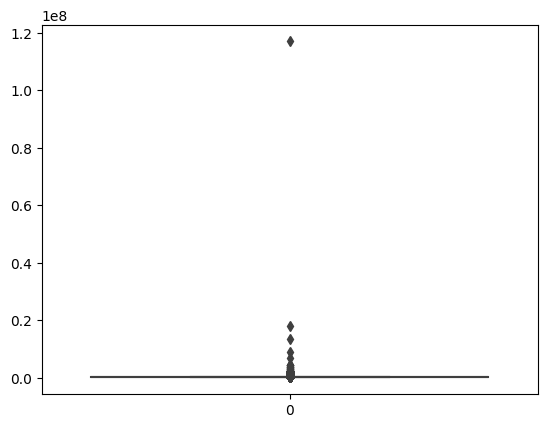

In [43]:
sns.boxplot(app_df.AMT_INCOME_TOTAL)
#we have an outlier here

In [44]:
len(app_df[app_df.AMT_INCOME_TOTAL>25000000])
# the num of people with income total > 25000000

1

In [45]:
app_df=app_df[app_df.AMT_INCOME_TOTAL<25000000]


<Axes: >

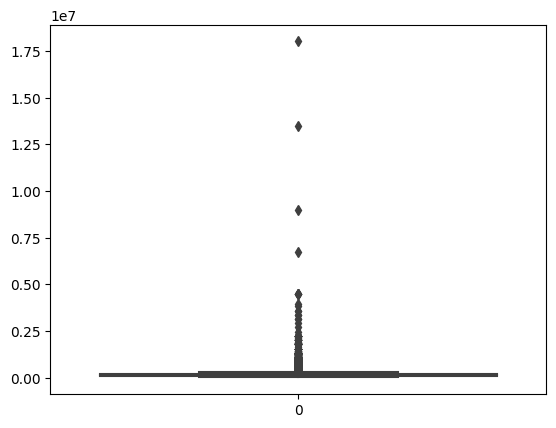

In [46]:
sns.boxplot(app_df.AMT_INCOME_TOTAL)

In [47]:
app_df.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [48]:
app_df.AMT_CREDIT.describe()

count    3.075060e+05
mean     5.990287e+05
std      4.024933e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: >

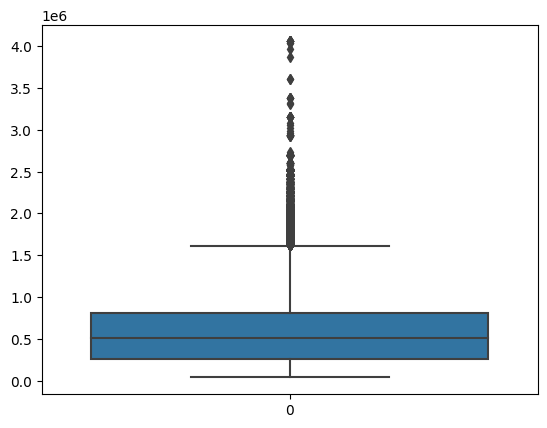

In [49]:
sns.boxplot(app_df.AMT_CREDIT)

In [50]:
app_df.AMT_ANNUITY.describe()
# It shows the count, mean, standard deviation, minimum, maximum, and quartiles of the numeric values in the column.

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: >

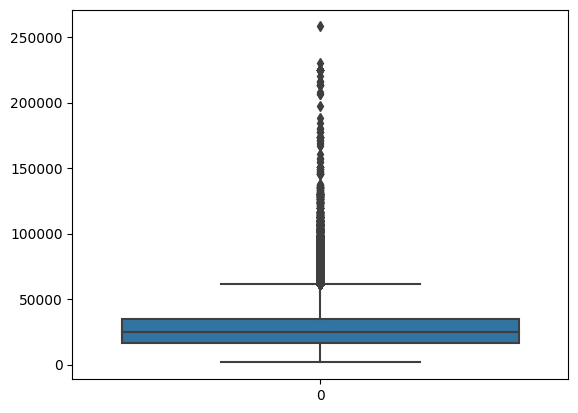

In [51]:
sns.boxplot(app_df.AMT_ANNUITY)


In [52]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [53]:
app_df.AMT_ANNUITY.describe()

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [54]:
app_df.AMT_ANNUITY.isnull().sum()
# checking the null values

12

**Filling the missing values with the median**

In [55]:
app_df.AMT_ANNUITY=app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median())
# we are using the median here cause Median is more robust than mean in
# as it is less affected by extreme values.

In [56]:
app_df.AMT_ANNUITY.isnull().sum()

0

<Axes: >

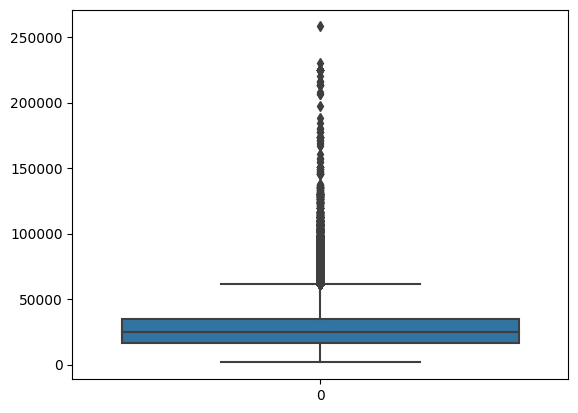

In [57]:
sns.boxplot(app_df.AMT_ANNUITY)

In [58]:
app_df['AMT_GOODS_PRICE'].describe()

count    3.072280e+05
mean     5.383980e+05
std      3.694478e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: ylabel='AMT_GOODS_PRICE'>

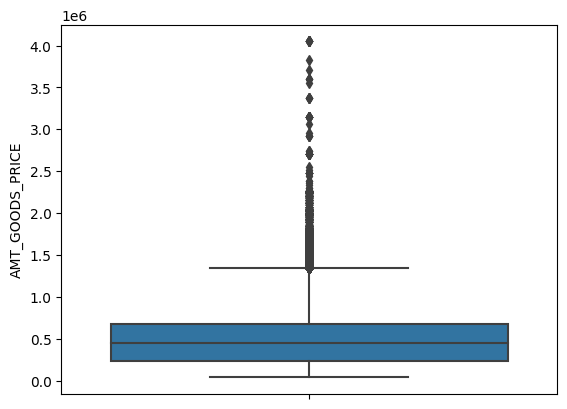

In [59]:
sns.boxplot(y=app_df['AMT_GOODS_PRICE'])

In [60]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [61]:
len(app_df[app_df['AMT_GOODS_PRICE'].isnull()])/len(app_df)*100
# calculates perc. of missing values

0.09040474007011245

In [62]:
app_df['AMT_GOODS_PRICE'].median()
# calculates median of rows for filling in null values

450000.0

**As our data may contain outliers we have to fill the missing values with median**

In [63]:
app_df['AMT_GOODS_PRICE']=app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())
# filling median of rows in null values

In [64]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [65]:
app_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248522
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [66]:
app_df.NAME_TYPE_SUITE.isnull().sum()
# checking null values

1292

**As this is a catergorical variable we will use mode to fill the missing values**

In [67]:
app_df.NAME_TYPE_SUITE=app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0])
# filling the categoriacal data with mode values

In [68]:
app_df.NAME_TYPE_SUITE.isnull().sum()
# checking if any null values left

0

In [69]:
app_df.NAME_INCOME_TYPE.value_counts()


Working                 158770
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [70]:
app_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218388
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [71]:
app_df.NAME_FAMILY_STATUS.value_counts()

Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [72]:
app_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272864
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [73]:
app_df.REGION_POPULATION_RELATIVE.describe()
# Normalized population of region where client lives

count    307506.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Axes: >

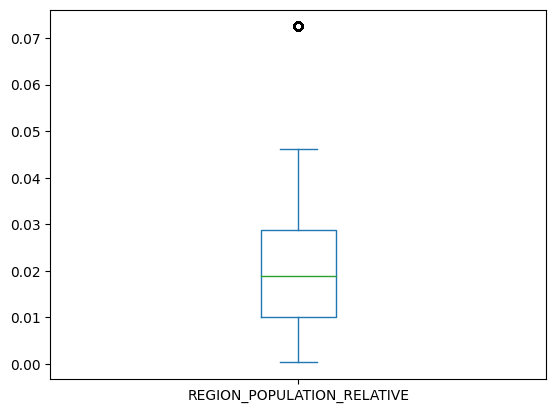

In [74]:
app_df.REGION_POPULATION_RELATIVE.plot.box()

In [75]:
app_df.DAYS_BIRTH.describe()
# as we can see there are negative values in it we have to convert them into the positive
# values are -ve cause . The negative values indicate that the dates are relative
# to the current date, which is assumed to be 0

count    307506.000000
mean     -16037.038399
std        4363.985156
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [76]:
app_df['DAYS_BIRTH'] = abs(app_df['DAYS_BIRTH'])
# convert them into the positive

In [77]:
app_df.DAYS_BIRTH.describe()

count    307506.000000
mean      16037.038399
std        4363.985156
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<Axes: >

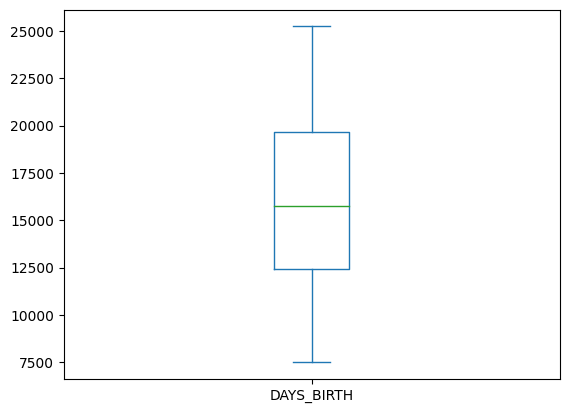

In [78]:
app_df.DAYS_BIRTH.plot.box()
# shows days since birth

In [79]:
app_df.DAYS_EMPLOYED.describe()
# shows days since employed

count    307506.000000
mean      63816.139734
std      141276.653998
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: >

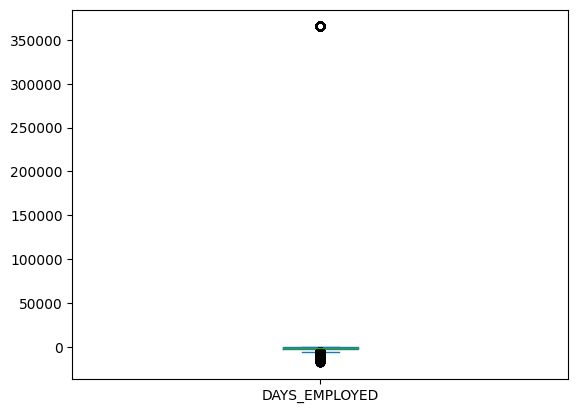

In [80]:
app_df.DAYS_EMPLOYED.plot.box()

In [81]:
#removing the outlier
app_df[app_df.DAYS_EMPLOYED==365243].shape

(55374, 73)

In [82]:
#removing the outlier
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED[app_df.DAYS_EMPLOYED<365243]


**After removal of outliers we have null values to treat**

In [83]:





app_df.DAYS_EMPLOYED.isnull().sum()

55374

In [84]:
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.fillna(app_df.DAYS_EMPLOYED.median())
# filling null with median

In [85]:
app_df.DAYS_EMPLOYED.isnull().sum()

0

**Lets also treat the neagative values**

In [86]:
app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])
# converting -ve to +ve

In [87]:
app_df.DAYS_EMPLOYED.describe()

count    307506.000000
mean       2251.586535
std        2136.162269
min           0.000000
25%         933.000000
50%        1648.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: >

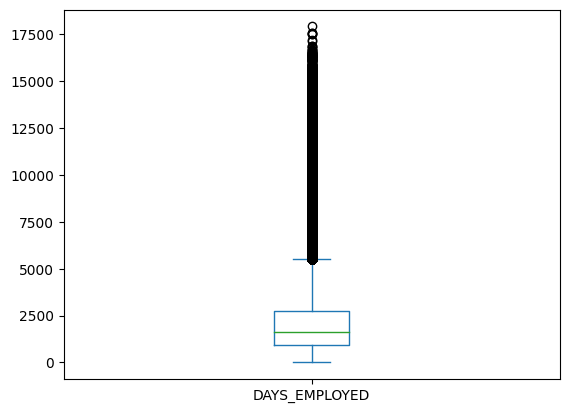

In [88]:
app_df.DAYS_EMPLOYED.plot.box()

In [89]:
app_df.DAYS_REGISTRATION.describe()

count    307506.000000
mean      -4986.125601
std        3522.887303
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [90]:
app_df['DAYS_REGISTRATION'] = abs(app_df['DAYS_REGISTRATION'])

<Axes: >

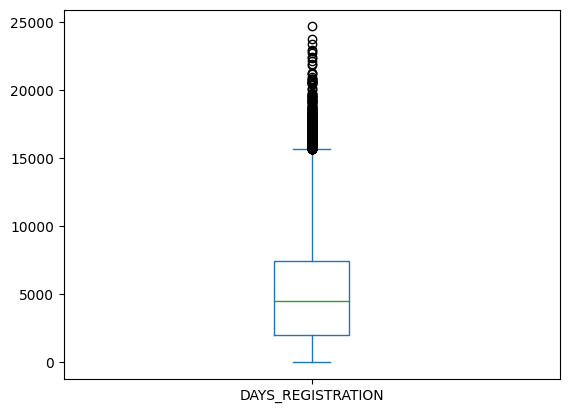

In [91]:
app_df.DAYS_REGISTRATION.plot.box()

In [92]:
app_df.DAYS_REGISTRATION.describe()
# How many days before the application did client change his registration

count    307506.000000
mean       4986.125601
std        3522.887303
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.750000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [93]:
app_df.DAYS_ID_PUBLISH.describe()
# How many days before the application did client change the identity document with which he applied for the loan

count    307506.000000
mean      -2994.199560
std        1509.456567
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [94]:
app_df['DAYS_ID_PUBLISH'] = abs(app_df['DAYS_ID_PUBLISH'])

<Axes: >

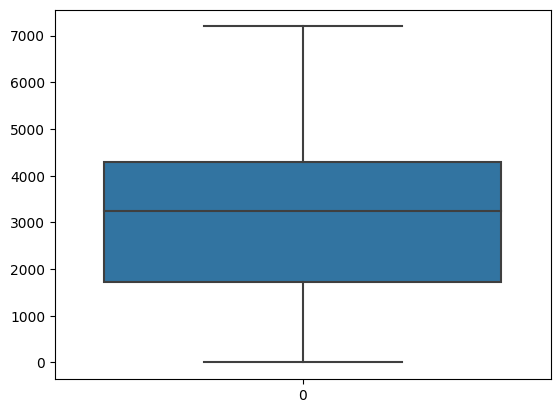

In [95]:
sns.boxplot(app_df.DAYS_ID_PUBLISH)

In [96]:
app_df.FLAG_MOBIL.value_counts()
# Did client provide mobile phone (1=YES, 0=NO)

1    307505
0         1
Name: FLAG_MOBIL, dtype: int64

<Axes: >

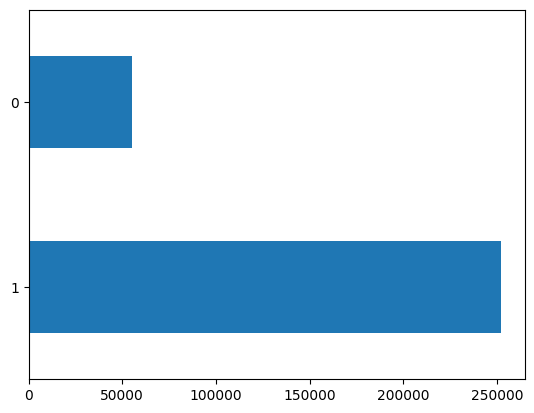

In [97]:
app_df.FLAG_EMP_PHONE.value_counts().plot.barh()
# plotting the graph for Did client work provide mobile phone (1=YES, 0=NO)

<Axes: >

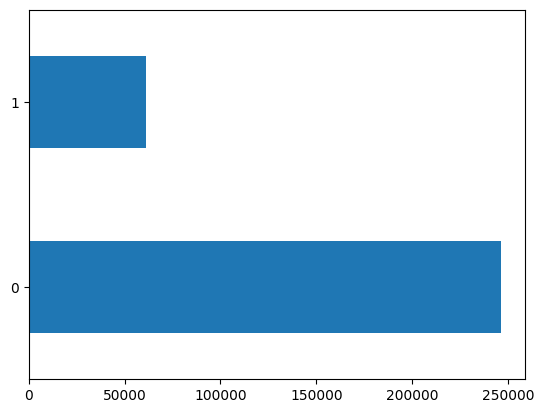

In [98]:
app_df.FLAG_WORK_PHONE.value_counts().plot.barh()
# Did client provide home phone (1=YES, 0=NO)

In [99]:
app_df.FLAG_CONT_MOBILE.value_counts()
#Was mobile phone reachable (1=YES, 0=NO)

1    306932
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

<Axes: >

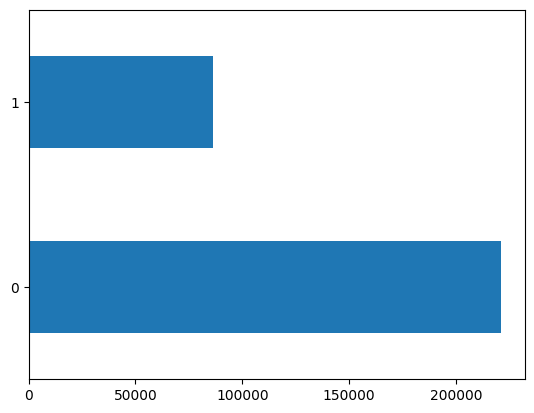

In [100]:
app_df.FLAG_PHONE.value_counts().plot.barh()

In [101]:
app_df.FLAG_EMAIL.value_counts()

0    290064
1     17442
Name: FLAG_EMAIL, dtype: int64

<Axes: >

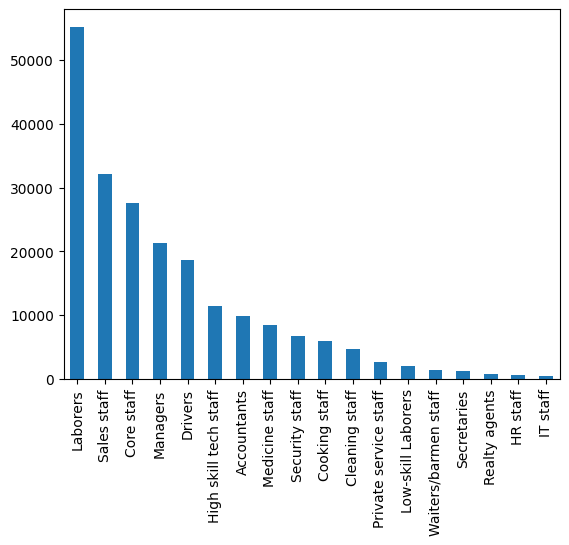

In [102]:
app_df.OCCUPATION_TYPE.value_counts().plot.bar()
# plotting ouucpation graph

In [103]:
app_df.OCCUPATION_TYPE.isnull().sum()
# types of occupation in data

96389

**Lets fill the missing values**

In [104]:
app_df.OCCUPATION_TYPE.mode()[0]
# mode value in OCCUPATION column

'Laborers'

In [105]:
app_df.OCCUPATION_TYPE=app_df.OCCUPATION_TYPE.fillna(app_df.OCCUPATION_TYPE.mode()[0])
# filling the null with mode value

In [106]:
app_df.OCCUPATION_TYPE.isnull().sum()

0

In [107]:
app_df.CNT_FAM_MEMBERS.describe()
# How many family members does client have

count    307504.000000
mean          2.152655
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<Axes: >

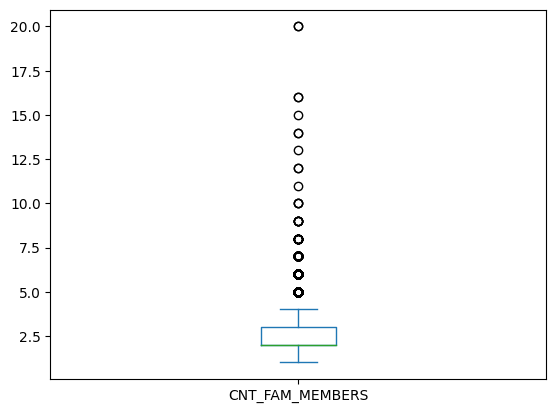

In [108]:
app_df.CNT_FAM_MEMBERS.plot.box()

In [109]:
app_df.CNT_FAM_MEMBERS.isnull().sum()

2

In [110]:
app_df.CNT_FAM_MEMBERS=app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.median())
# filling null with median value

In [111]:
app_df.CNT_FAM_MEMBERS.isnull().sum()

0

<Axes: >

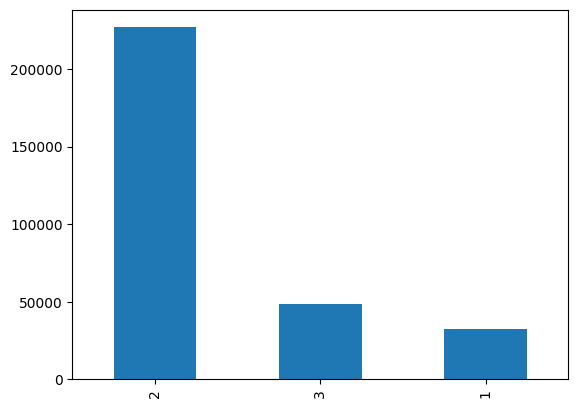

In [112]:
app_df.REGION_RATING_CLIENT.value_counts().plot.bar()
# Our rating of the region where client lives (1,2,3)

<Axes: >

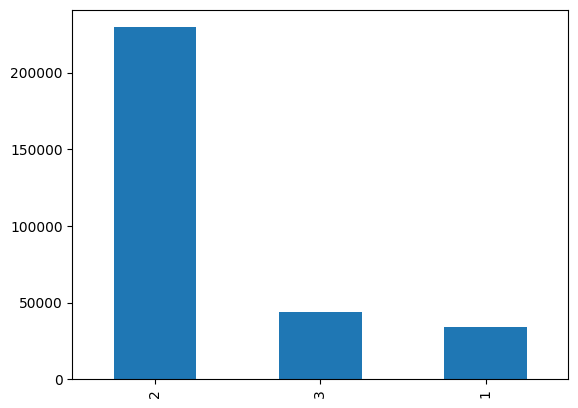

In [113]:
app_df.REGION_RATING_CLIENT_W_CITY.value_counts().plot.bar()


<Axes: >

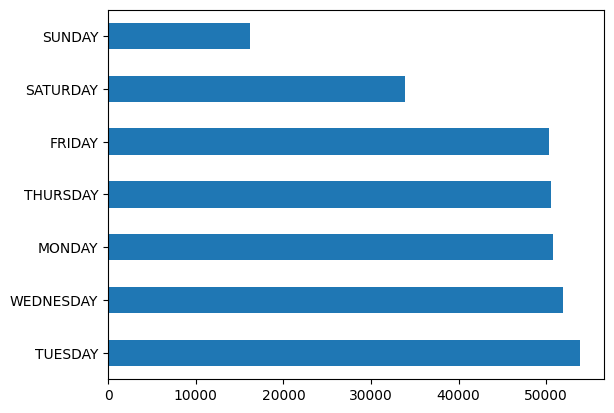

In [114]:
app_df.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()
# On which day of the week did the client apply for the loan

In [115]:
app_df.HOUR_APPR_PROCESS_START.value_counts()
# Approximately at what day hour did the client apply for the previous application

10    37721
11    37229
12    34233
13    30959
14    27681
9     27384
15    24837
16    20384
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [116]:
app_df.REG_REGION_NOT_LIVE_REGION.value_counts()
# Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

0    302849
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [117]:
app_df.REG_REGION_NOT_WORK_REGION.value_counts()

0    291894
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [118]:
app_df.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295003
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [119]:
app_df.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283467
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [120]:
app_df.REG_CITY_NOT_WORK_CITY.value_counts()

0    236639
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

<Axes: >

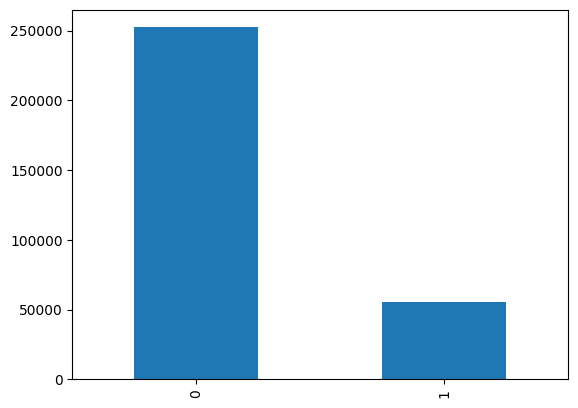

In [121]:
app_df.LIVE_CITY_NOT_WORK_CITY.value_counts().plot.bar()

In [122]:
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

**Droping Unwanted columns**

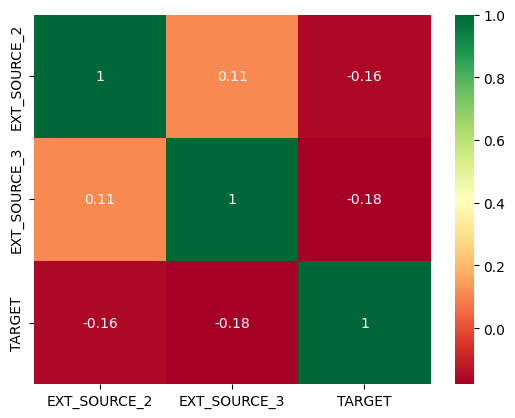

In [123]:
unwanted = app_df[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
unwanted_corr = unwanted.corr()
ax = sns.heatmap(unwanted_corr,
            xticklabels=unwanted_corr.columns,
            yticklabels=unwanted_corr.columns,
            annot = True,
            cmap ="RdYlGn")
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

**Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns**

In [124]:
app_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [125]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [126]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE=app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median())
# filling with median

In [127]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [128]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307506.000000
mean          1.417491
std           2.398340
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

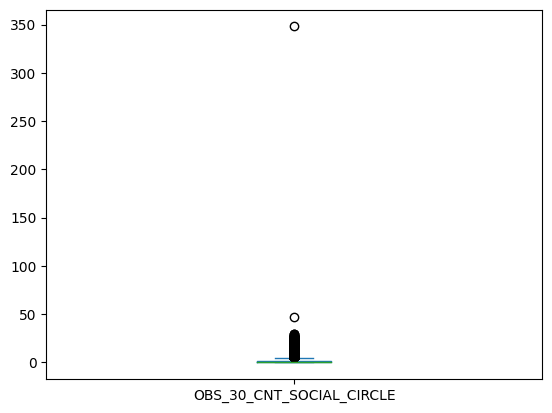

In [129]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

In [130]:
app_df[app_df.OBS_30_CNT_SOCIAL_CIRCLE>=60]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246       10111         1917.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403             2306.0             2306           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
148403                        1            Police                     348.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
148403                      34.0                     344.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
148403                      24.0                  -667.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
148403                0                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
148403                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
148403                         3.0

In [131]:
app_df=app_df[app_df.OBS_30_CNT_SOCIAL_CIRCLE<47]

In [132]:
app_df.shape

(307504, 71)

<Axes: >

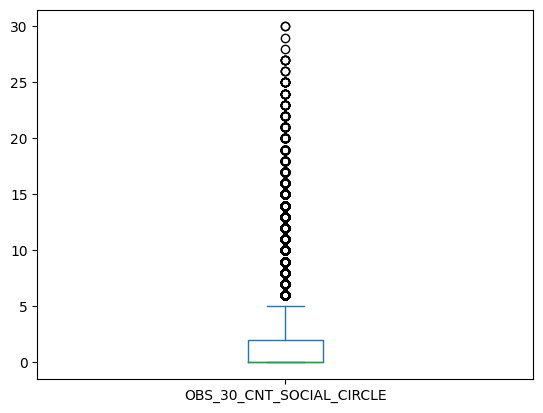

In [133]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

In [134]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307504.000000
mean          1.416216
std           2.314019
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [135]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

**Droping Null values**

In [136]:
app_df.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)

In [137]:
app_df.shape

(306483, 71)

In [138]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          0.143297
std           0.442440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

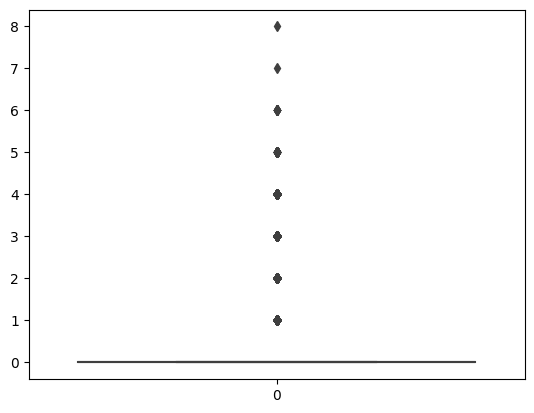

In [139]:
sns.boxplot(app_df.DEF_30_CNT_SOCIAL_CIRCLE)

In [140]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [141]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          1.403993
std           2.296407
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

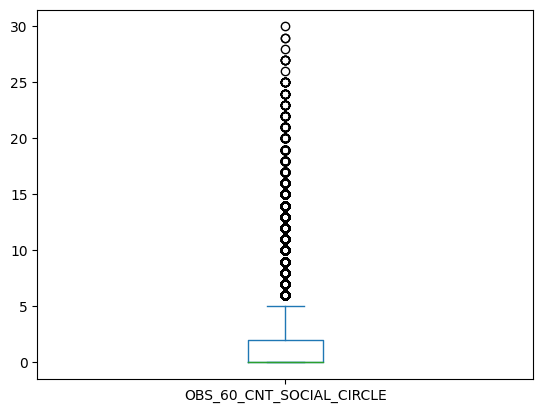

In [142]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.plot.box()

In [143]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [144]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          0.099957
std           0.359641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

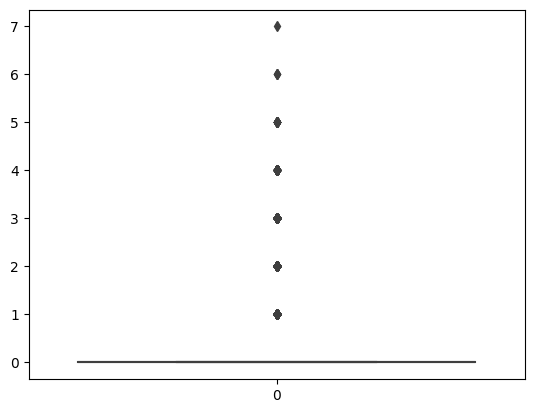

In [145]:
sns.boxplot(app_df.DEF_60_CNT_SOCIAL_CIRCLE)

In [146]:
app_df[app_df.DAYS_LAST_PHONE_CHANGE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15709                    0.010643        8574          293.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
15709             4790.0             1075           0               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
15709                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
15709        Laborers              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
15709                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
15709                       13                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
15709                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
15709                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
15709                        0     Trade: type 3                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
15709                       0.0                     NaN                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
15709                0                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
15709                0                1                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
15709                 0                 0                 0                 1   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
15709                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
15709                        NaN                         NaN

In [147]:
app_df.shape

(306483, 71)

In [148]:
app_df=app_df.drop(15709)

In [149]:
app_df.shape

(306482, 71)

In [150]:
app_df.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean       -963.471470
std         826.992961
min       -4292.000000
25%       -1570.000000
50%        -758.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [151]:
app_df.DAYS_LAST_PHONE_CHANGE=abs(app_df.DAYS_LAST_PHONE_CHANGE)
# converting -ve values into +ve cause those are days

In [152]:
app_df.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean        963.471470
std         826.992961
min           0.000000
25%         274.000000
50%         758.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<Axes: >

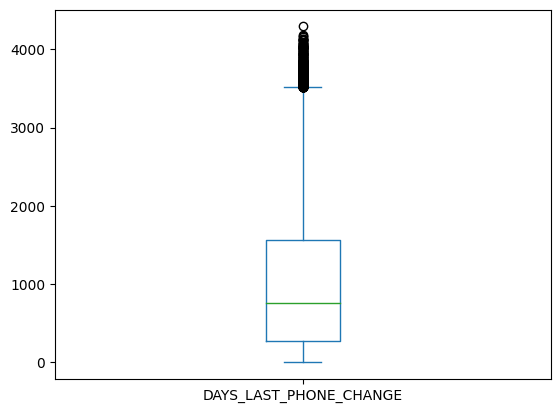

In [153]:
app_df.DAYS_LAST_PHONE_CHANGE.plot.box()

**Dropping unwanted columns**

In [154]:
flag = app_df[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]

<Axes: >

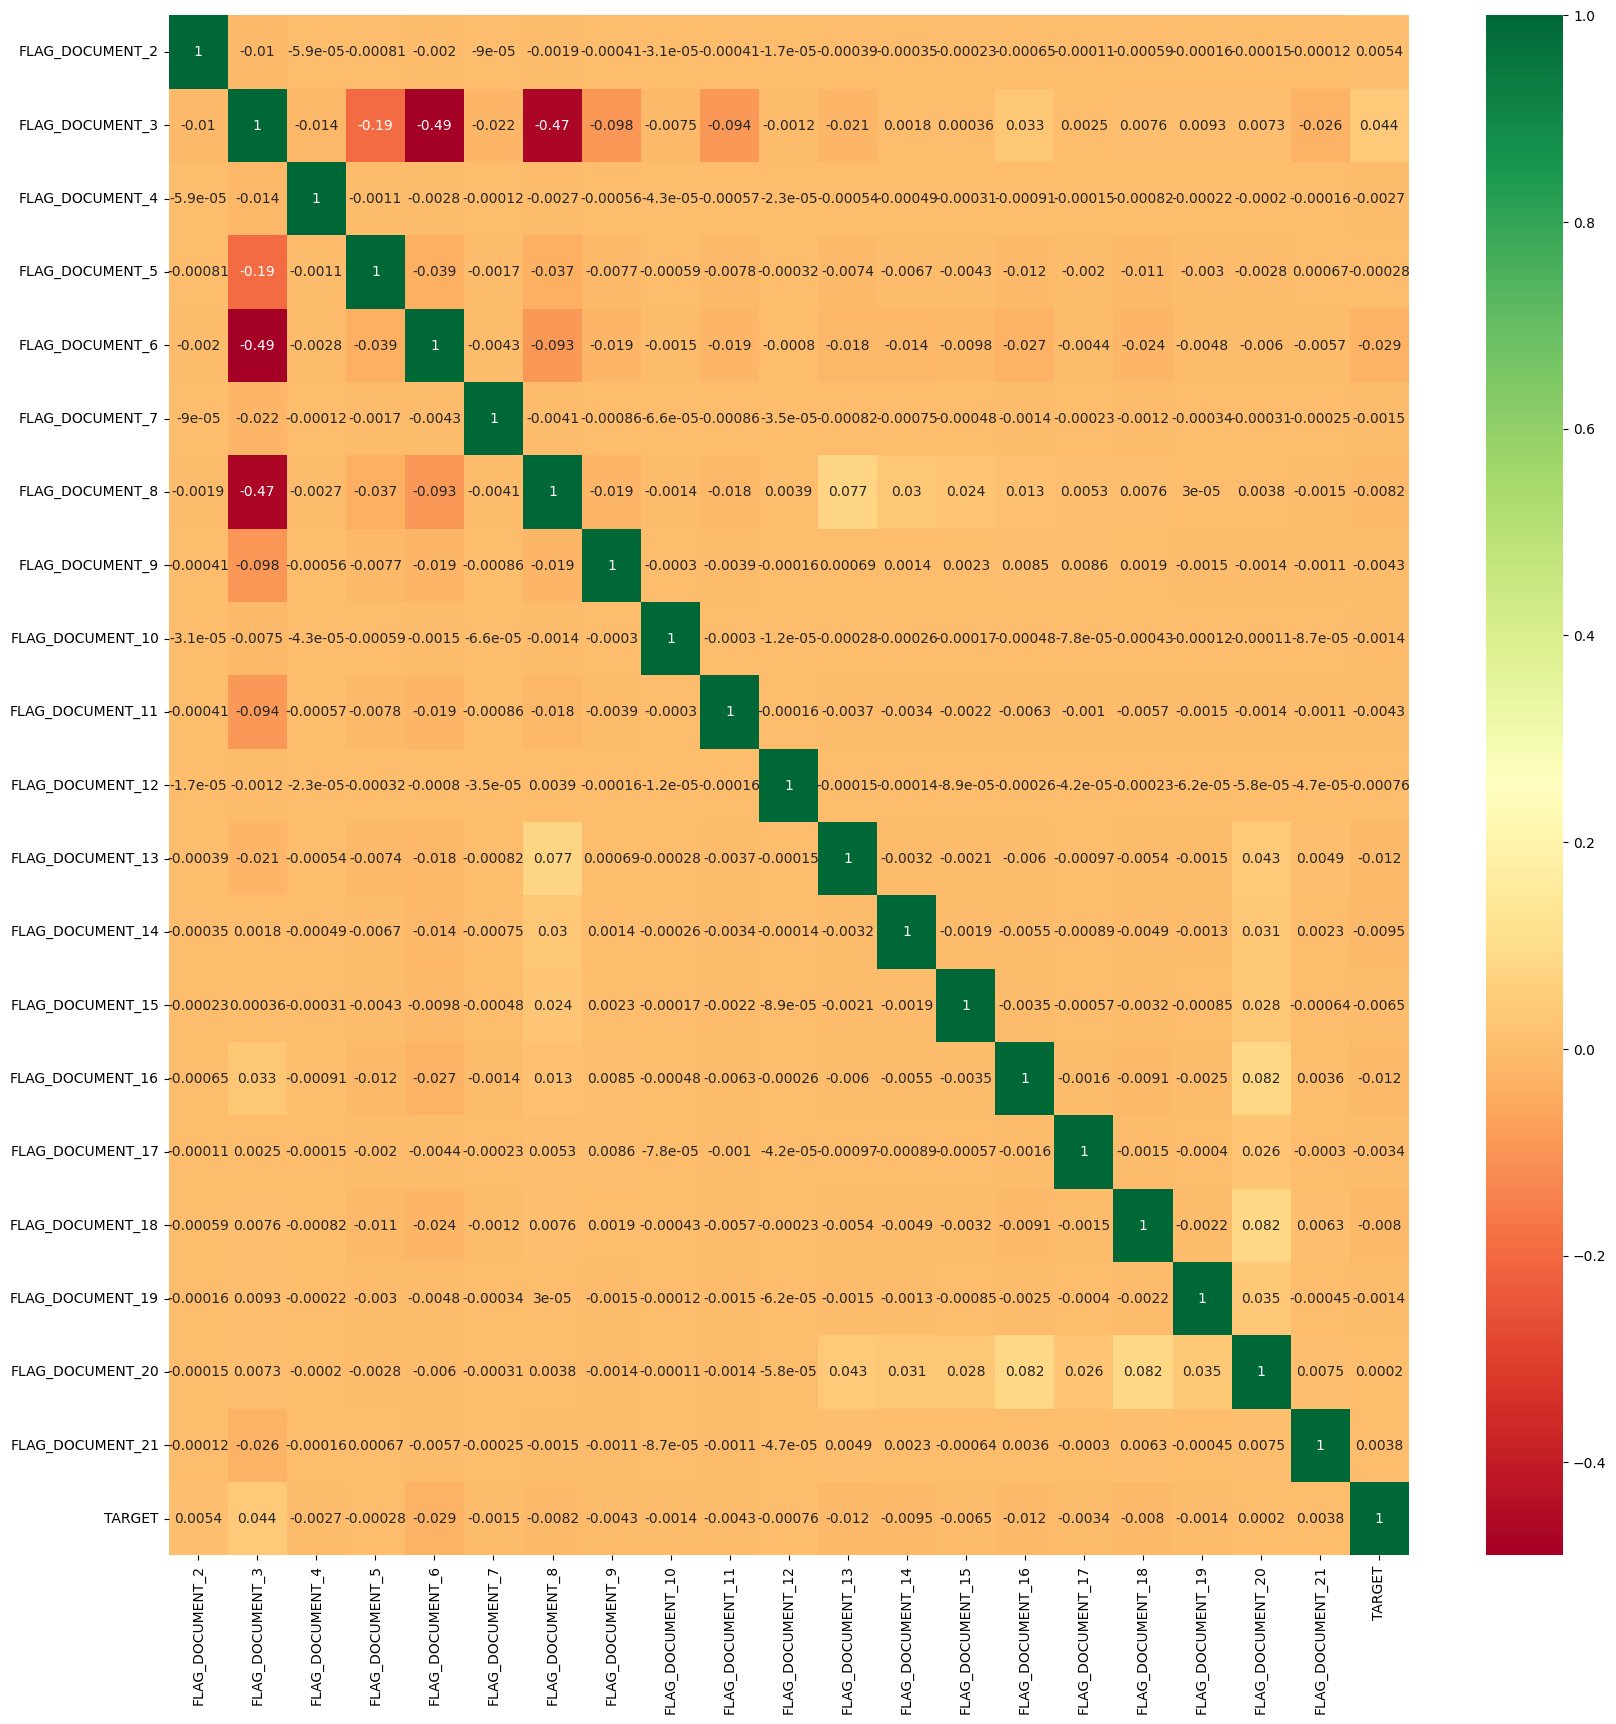

In [155]:
# We are plotting the heatmap to visualize the correlation matrix of the flag dataset.
# A correlation matrix shows the pairwise

fig = plt.figure(figsize=(20,20))
flag_corr=flag.corr()
sns.heatmap(flag_corr,
            xticklabels=flag_corr.columns,
            yticklabels=flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**As we can see there is not much of the correlation betweeen the flag_documents_X and the target varible so we can remove them**

In [156]:
app_df.iloc[:, 45:65].columns
# checking column number of flag_documents for removing them

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [157]:
app_df.drop(app_df.iloc[:, 45:65], inplace=True, axis=1)
# removing the columns

In [158]:
app_df.shape
# checking the shape

(306482, 51)

In [159]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()
# null values eveluation

41348

In [160]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR=app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.median())
# filling null values with median

In [161]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()
# checking null

0

In [162]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    306482.000000
mean          0.005527
std           0.077958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

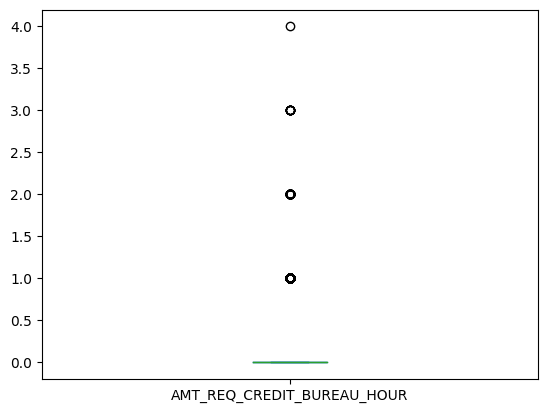

In [163]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()

In [164]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41348

In [165]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY=app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.median())
# filling null values with median

In [166]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [167]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    306482.000000
mean          0.006072
std           0.103194
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: >

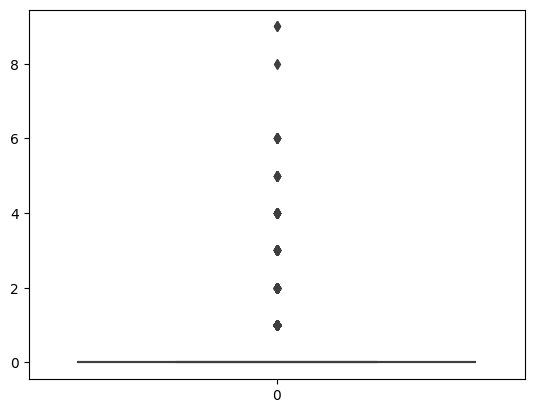

In [168]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_DAY)

In [169]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41348

In [170]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK=app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.median())
# filling null with median value

In [171]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [172]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    306482.000000
mean          0.029767
std           0.190852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: >

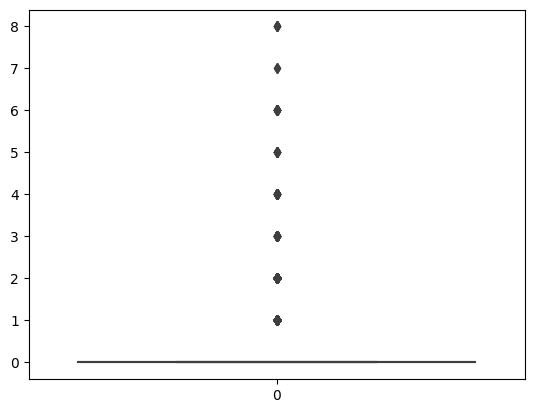

In [173]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_WEEK)

In [174]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41348

In [175]:
app_df.AMT_REQ_CREDIT_BUREAU_MON=app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.median())

In [176]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [177]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    306482.000000
mean          0.231341
std           0.856445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: >

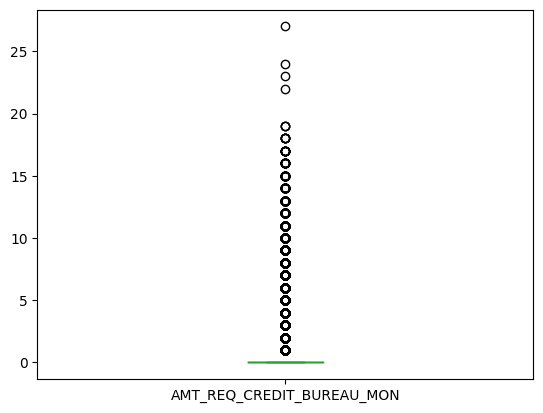

In [178]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.plot.box()

**Lets remove the outlier**

In [179]:
app_df=app_df[app_df.AMT_REQ_CREDIT_BUREAU_MON<20]

In [180]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41348

In [181]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT=app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.median())

In [182]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    306478.000000
mean          0.229804
std           0.744554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: >

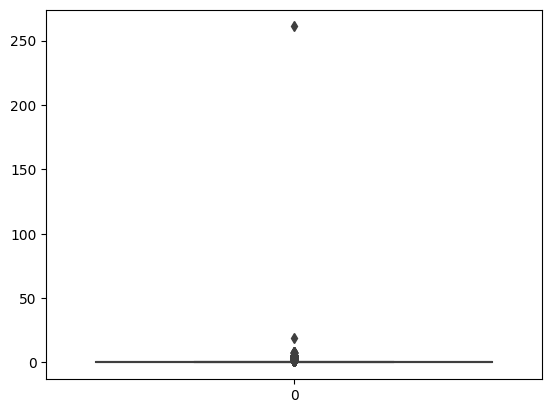

In [183]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_QRT)

In [184]:
app_df[app_df.AMT_REQ_CREDIT_BUREAU_QRT>50]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
239474      30393.0        1035000.0   Unaccompanied          Working   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
239474    Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
239474                    0.026392       13590         3336.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
239474             3629.0             3267           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
239474                0                 1           1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
239474     Accountants              3.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
239474                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
239474                       19                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
239474                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
239474                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
239474                        0  Business Entity Type 2   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
239474                   695.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
239474                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
239474                        1.0                      261.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
239474                         0.0

In [185]:
app_df=app_df[app_df.AMT_REQ_CREDIT_BUREAU_QRT<50]

In [186]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41348

In [187]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR=app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [188]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    306477.000000
mean          1.779439
std           1.765418
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: >

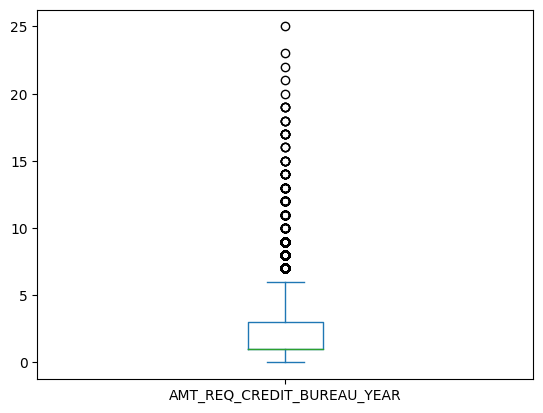

In [189]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()

# Final Check

In [190]:
contact = app_df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']]

<Axes: >

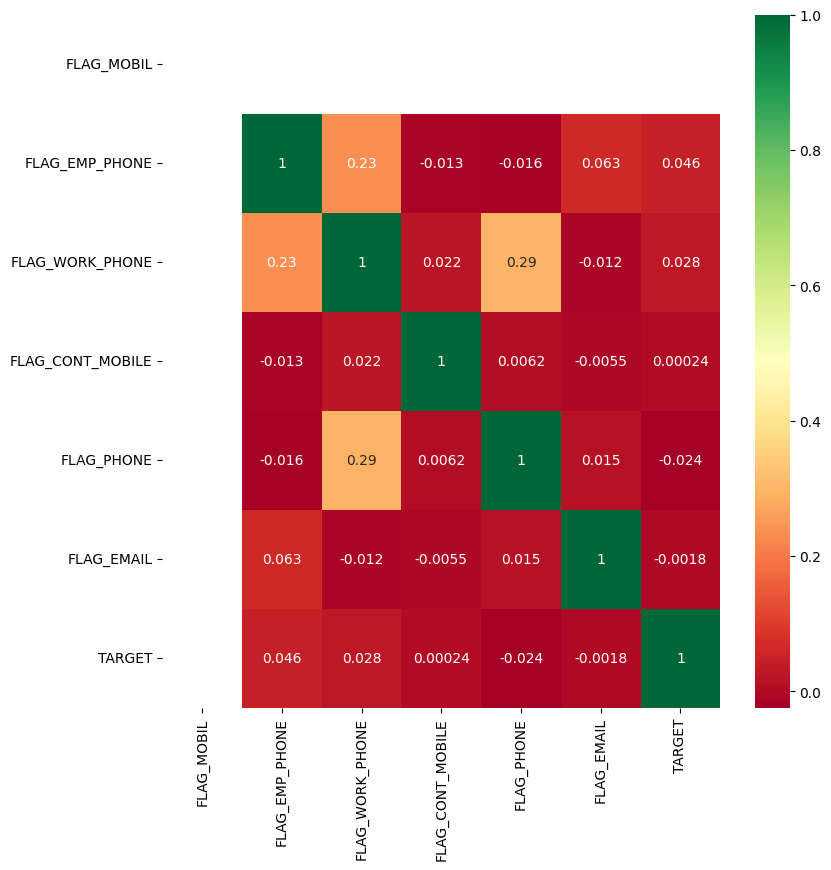

In [191]:

fig = plt.figure(figsize=(9,9))
contact_corr=contact.corr()
sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted**

In [192]:
app_df.iloc[:,23:27].columns
# retrienving column numbers of flags

Index(['FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype='object')

In [193]:
app_df.drop(app_df.iloc[:, 23:27], inplace=True, axis=1)

In [194]:
app_df.shape

(306477, 47)

In [195]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306477 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306477 non-null  int64  
 1   TARGET                       306477 non-null  int64  
 2   NAME_CONTRACT_TYPE           306477 non-null  object 
 3   CODE_GENDER                  306477 non-null  object 
 4   FLAG_OWN_CAR                 306477 non-null  object 
 5   FLAG_OWN_REALTY              306477 non-null  object 
 6   CNT_CHILDREN                 306477 non-null  int64  
 7   AMT_INCOME_TOTAL             306477 non-null  float64
 8   AMT_CREDIT                   306477 non-null  float64
 9   AMT_ANNUITY                  306477 non-null  float64
 10  AMT_GOODS_PRICE              306477 non-null  float64
 11  NAME_TYPE_SUITE              306477 non-null  object 
 12  NAME_INCOME_TYPE             306477 non-null  object 
 13 

In [196]:
#Conversion of Object and Numerical columns to Categorical Columns
#cause we want to reduce the memory usage, improve the performance, or encode the meaning of the data.
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    app_df[col] =pd.Categorical(app_df[col])

In [197]:
app_df.info()
# checking if converted to categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306477 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306477 non-null  int64   
 1   TARGET                       306477 non-null  int64   
 2   NAME_CONTRACT_TYPE           306477 non-null  category
 3   CODE_GENDER                  306477 non-null  category
 4   FLAG_OWN_CAR                 306477 non-null  category
 5   FLAG_OWN_REALTY              306477 non-null  category
 6   CNT_CHILDREN                 306477 non-null  int64   
 7   AMT_INCOME_TOTAL             306477 non-null  float64 
 8   AMT_CREDIT                   306477 non-null  float64 
 9   AMT_ANNUITY                  306477 non-null  float64 
 10  AMT_GOODS_PRICE              306477 non-null  float64 
 11  NAME_TYPE_SUITE              306477 non-null  object  
 12  NAME_INCOME_TYPE             306477 non-null

**Lets create some bins for our dataset**

We are creating bins for income amount to group the continuous numeric data into discrete categories. This can help us to analyze the data in logical ways, such as finding the frequency, distribution, or correlation of different income ranges.

In [198]:
# Creating bins for income amount
app_df['AMT_INCOME_TOTAL']=app_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [199]:
app_df['AMT_INCOME_RANGE'].value_counts()

100K-200K    155470
200k-300k     64924
0-100K        63530
300k-400k     14605
400k-500k      5298
500k-600k      1083
600k-700k       848
800k-900k       291
700k-800k       157
900k-1M          28
1M Above         18
Name: AMT_INCOME_RANGE, dtype: int64

In [200]:
# Creating bins for Credit amount
app_df['AMT_CREDIT']=app_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=slots)

In [201]:
app_df['AMT_CREDIT_RANGE'].value_counts()

200k-300k    54501
1M Above     49877
500k-600k    34174
400k-500k    31928
100K-200K    29921
300k-400k    26245
600k-700k    23998
800k-900k    21733
700k-800k    19169
900k-1M       8927
0-100K        6004
Name: AMT_CREDIT_RANGE, dtype: int64

In [202]:
# Creating bins for Age
app_df['AGE'] = app_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,60,100]
slots = ['0-20','20-30','30-40','40-50','59-60','60 above']

app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

In [203]:
app_df['AGE_GROUP'].value_counts()

30-40       82860
40-50       74153
59-60       67582
20-30       52595
60 above    29286
0-20            1
Name: AGE_GROUP, dtype: int64

In [204]:
# Creating bins for Employement Time
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_df['EMPLOYMENT_YEAR']=pd.cut(app_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [205]:
app_df['EMPLOYMENT_YEAR'].value_counts()

0-5         179405
5-10         55815
10-20        32524
20-30         8385
30-40         2367
40-50          174
50-60            0
60 above         0
Name: EMPLOYMENT_YEAR, dtype: int64

In [206]:
app_df.shape

(306477, 53)

# Univariate/Bivariate Analysis

In [207]:
defaulters=app_df[app_df.TARGET==1]
non_defaulters=app_df[app_df.TARGET==0]

In [208]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.911954
1     8.088046
Name: TARGET, dtype: float64

In [209]:
app_df.TARGET.value_counts(normalize=True)

0    0.91912
1    0.08088
Name: TARGET, dtype: float64

In [210]:
len(defaulters)/len(non_defaulters)*100

8.799775639091338

<Axes: ylabel='TARGET'>

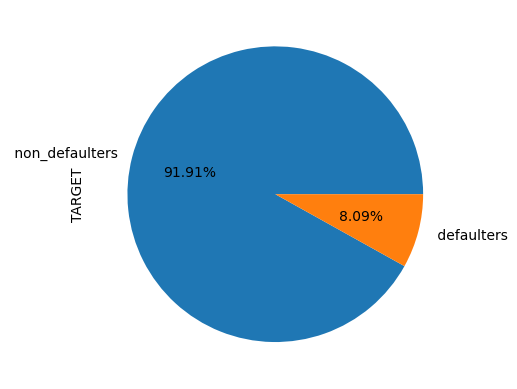

In [211]:
labels = ' non_defaulters', ' defaulters'
app_df.TARGET.value_counts().plot.pie(autopct='%1.2f%%',labels=labels)


**The data is unbalanced**

**Out of total only 8 percent people are the defaulters**

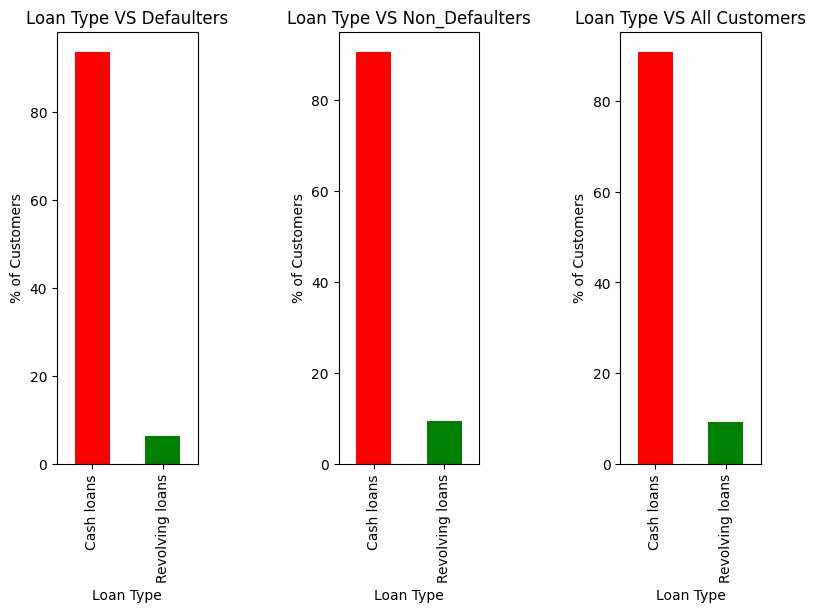

In [212]:
plt.subplot(1,3,1)
(defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Defaulters")

plt.subplot(1,3,2)
(non_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Non_Defaulters")

plt.subplot(1,3,3)
(app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS All Customers")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=1,
                    wspace=1,
                    hspace=0.4)
plt.show()



In [213]:
#  % defaulters on revolving loans
len(app_df[(app_df.NAME_CONTRACT_TYPE=='Revolving loans') & app_df.TARGET==1])/len(app_df[app_df.NAME_CONTRACT_TYPE=='Revolving loans'])*100

5.549656685779005

In [214]:
#  % defaulters on Cash Loan
len(app_df[(app_df.NAME_CONTRACT_TYPE=='Cash loans') & app_df.TARGET==1])/len(app_df[app_df.NAME_CONTRACT_TYPE=='Cash loans'])*100

8.345823314391692

In [215]:
#  Total loans
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.781037
Revolving loans     9.218963
Name: NAME_CONTRACT_TYPE, dtype: float64

**1 If we look at the number most are the customers have take the cash loans rather than revolving loan.**

**2 If we look the deafaulters more than 85 percent defaulters are on cash loan**


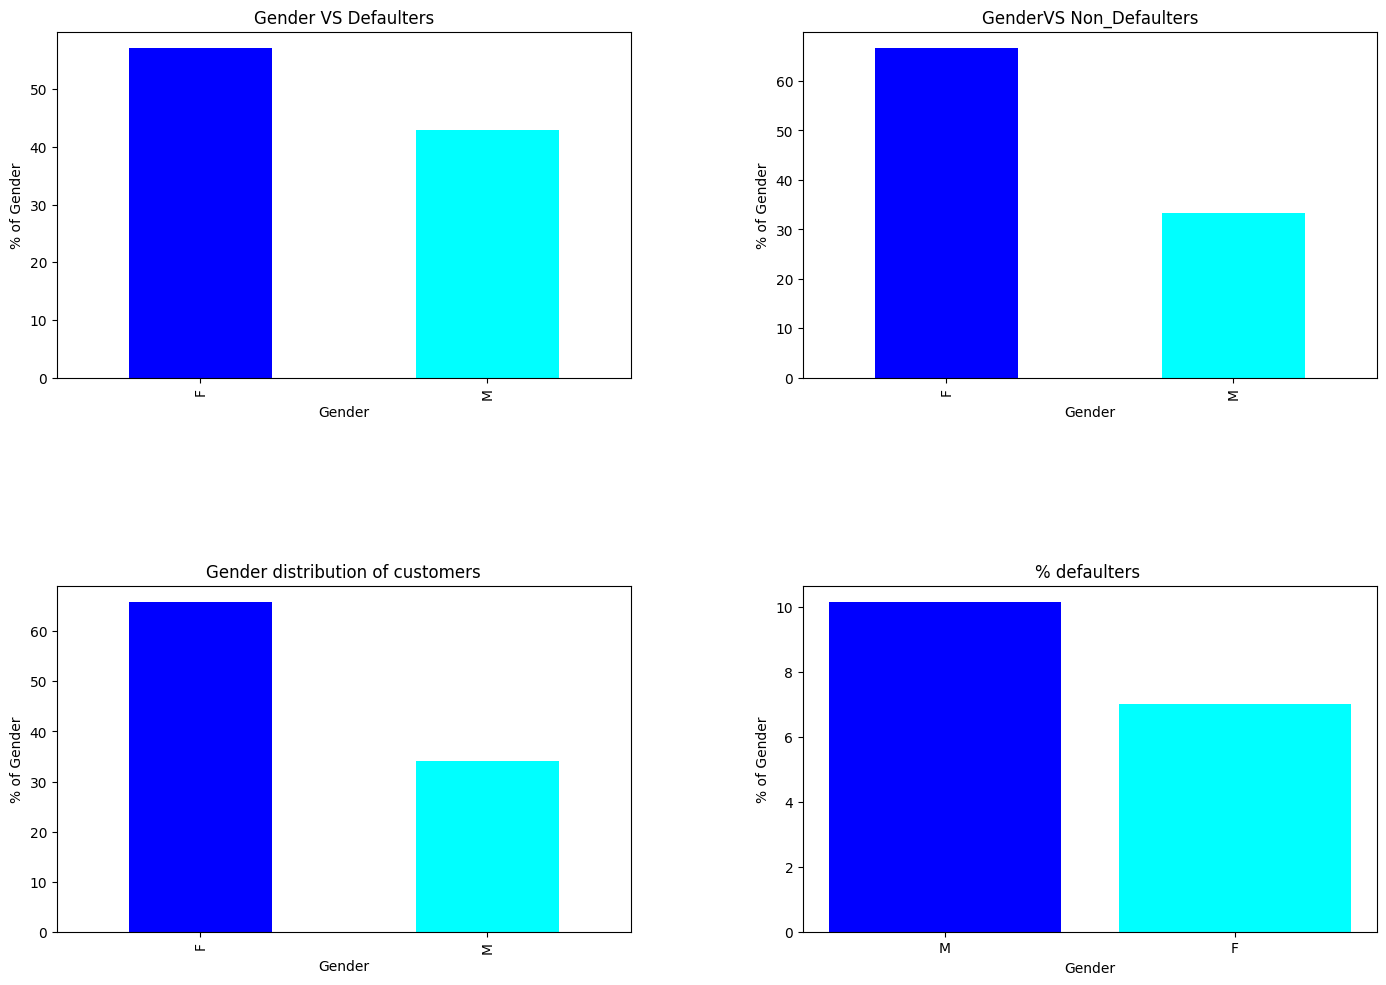

In [216]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
(defaulters.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("Gender VS Defaulters")

plt.subplot(2,2,2)
(non_defaulters.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("GenderVS Non_Defaulters")

plt.subplot(2,2,3)
(app_df.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("Gender distribution of customers")

plt.subplot(2,2,4)

per_def = app_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
per_def["TARGET"] = per_def["TARGET"]*100
per_def.sort_values(by='TARGET', ascending=False, inplace=True)

s = plt.bar('CODE_GENDER',
                    'TARGET',
                    data=per_def,color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("% defaulters ")



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=1,
                    wspace=0.3,
                    hspace=0.6)
plt.show()



**1 There are more female than male**

**2 More no of female are have defaulted the payments due to there grater no**

**3 Men are tend to become more defaulters than women even with their small representation**

In [217]:
# lets make some custom functions

def analysis(feature):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    (defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['blue', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Defaulters")

    plt.subplot(2,2,2)
    (non_defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Non_Defaulters")

    plt.subplot(2,2,3)
    (app_df[feature].value_counts(normalize=True)*100).plot.bar(color=['yellow', 'cyan'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("distribution of customers")

    plt.subplot(2,2,4)

    per_def= app_df[[feature , 'TARGET']].groupby([feature],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)

    s = plt.bar(feature, 'TARGET',data=per_def,color=['purple', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)


    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1.2,
                        top=1,
                        wspace=0.3,
                        hspace=0.6)
    plt.show()

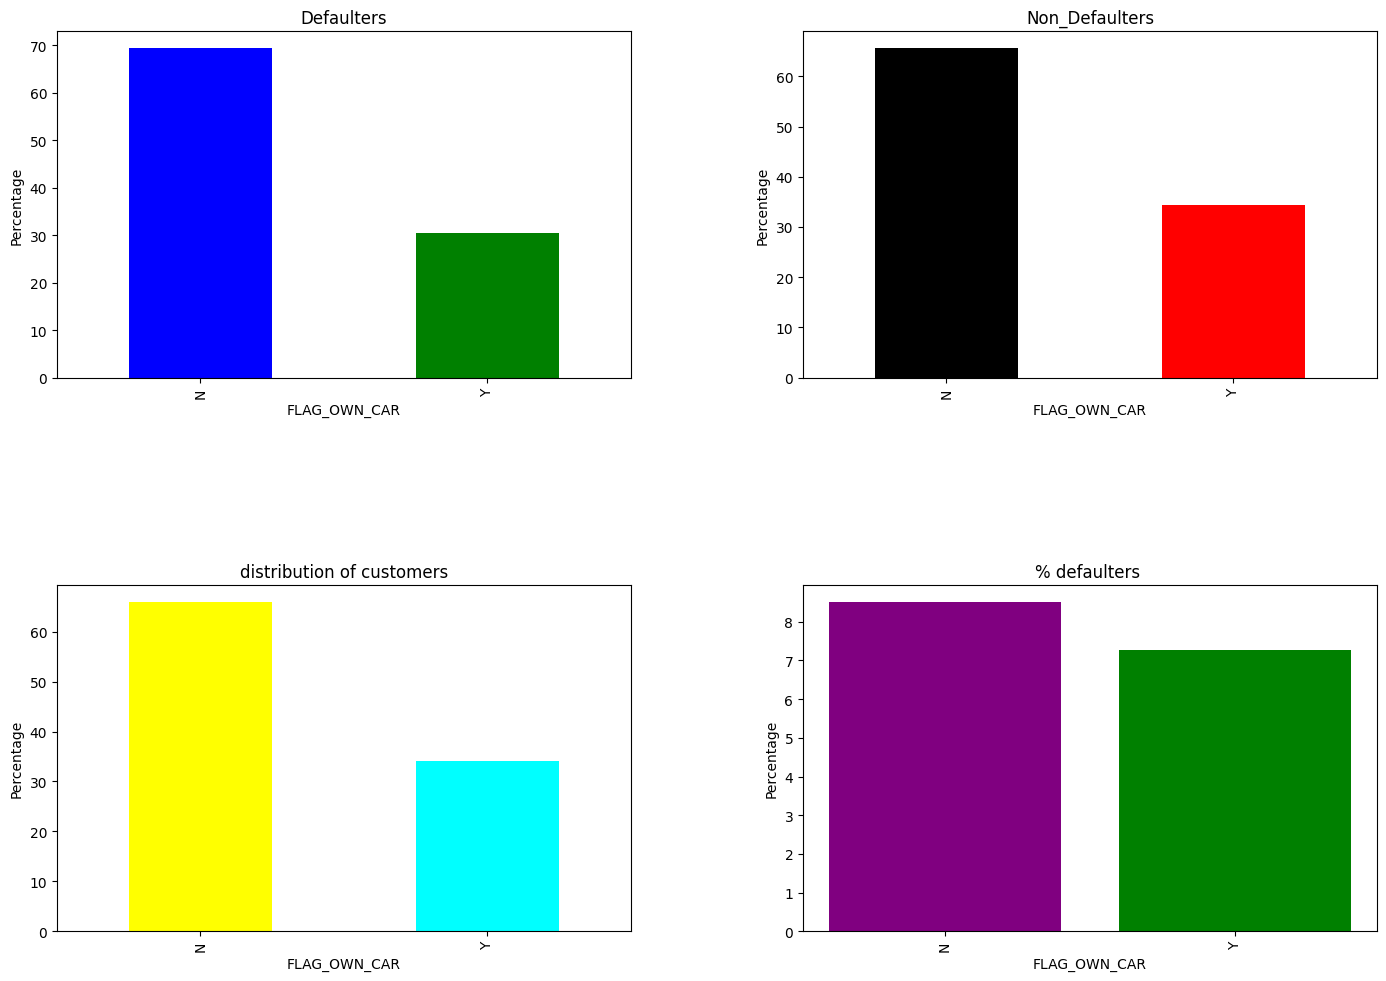

In [218]:
analysis('FLAG_OWN_CAR')

**We can't establish an significant relationship between owning a car and defaulting a payment**

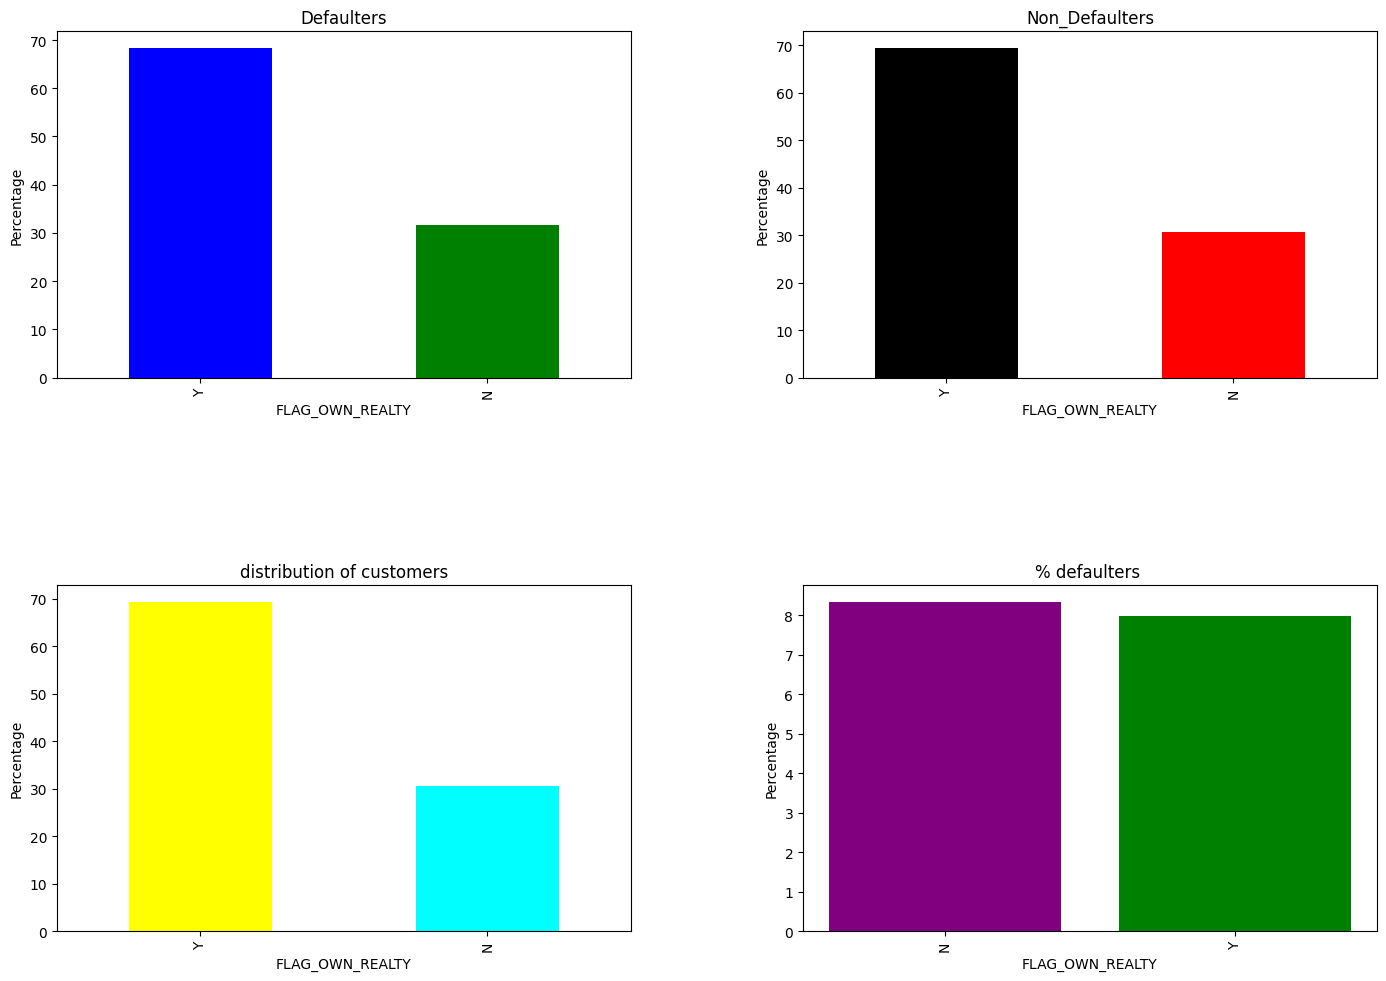

In [219]:
analysis('FLAG_OWN_REALTY')

**People owning a property are double in number but still defaulting percentage is quite same**

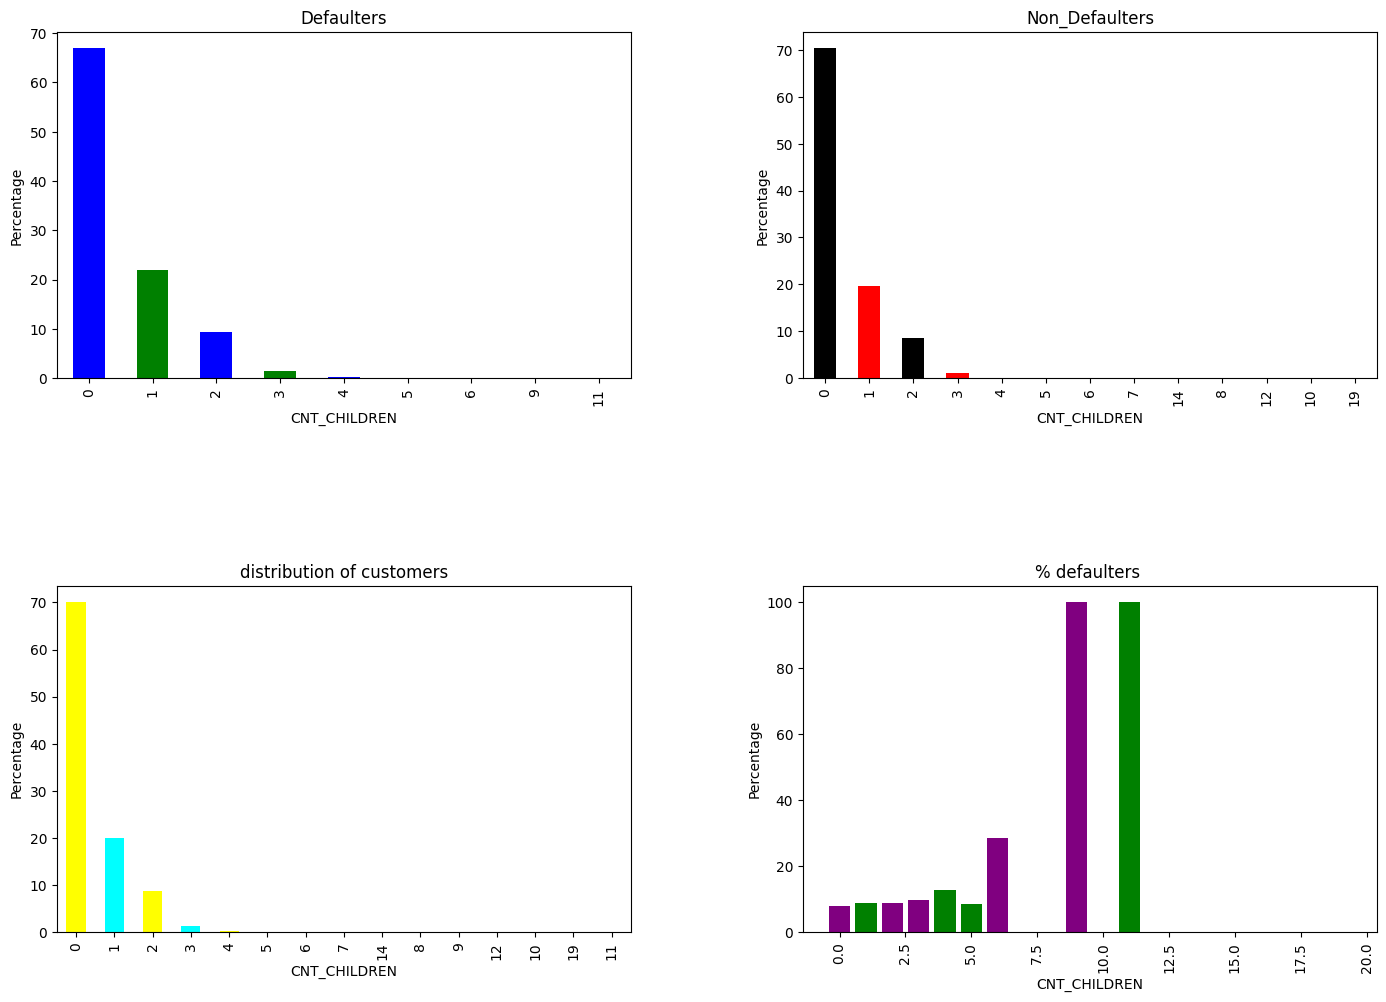

In [220]:
analysis('CNT_CHILDREN')

In [221]:
len(app_df[(app_df.CNT_CHILDREN==6)])

21

In [222]:
len(app_df[(app_df.CNT_CHILDREN==6) & app_df.TARGET==1])

6

**1 Mostly customers are having zero children**

**2 Parents with 6 kids and more are the highest number of defaulters but its worth noting that there number is very less**



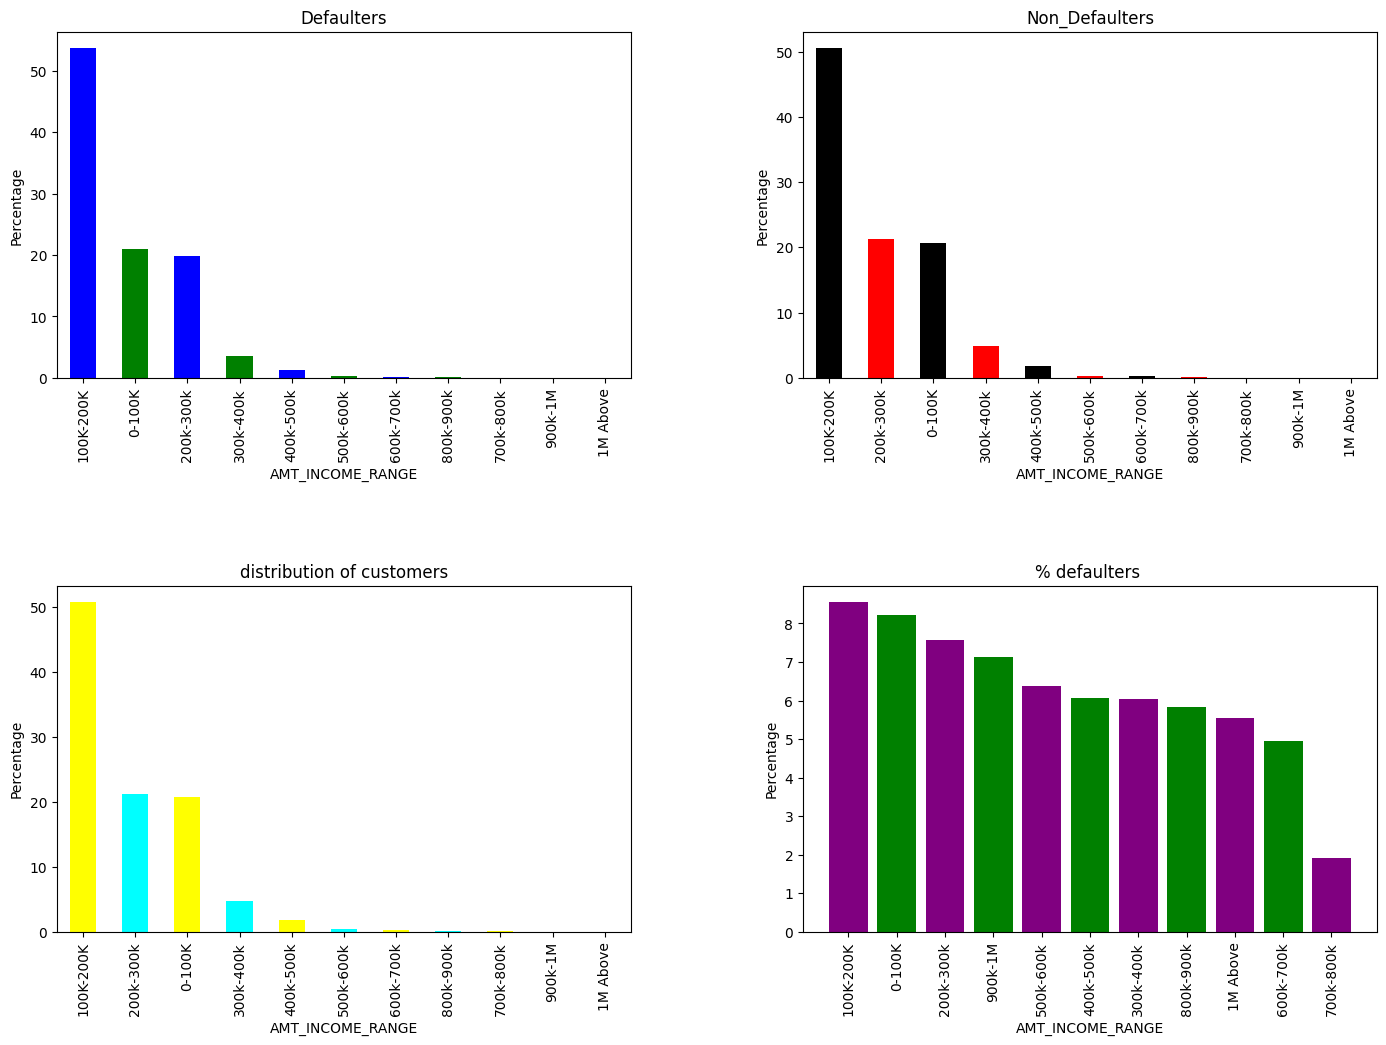

In [223]:
analysis('AMT_INCOME_RANGE')

**1 Most of the loans were given to the people with salaries less than 300k**

**2 If the salary is less than 500k more chances of defaulting chances for defaulting**

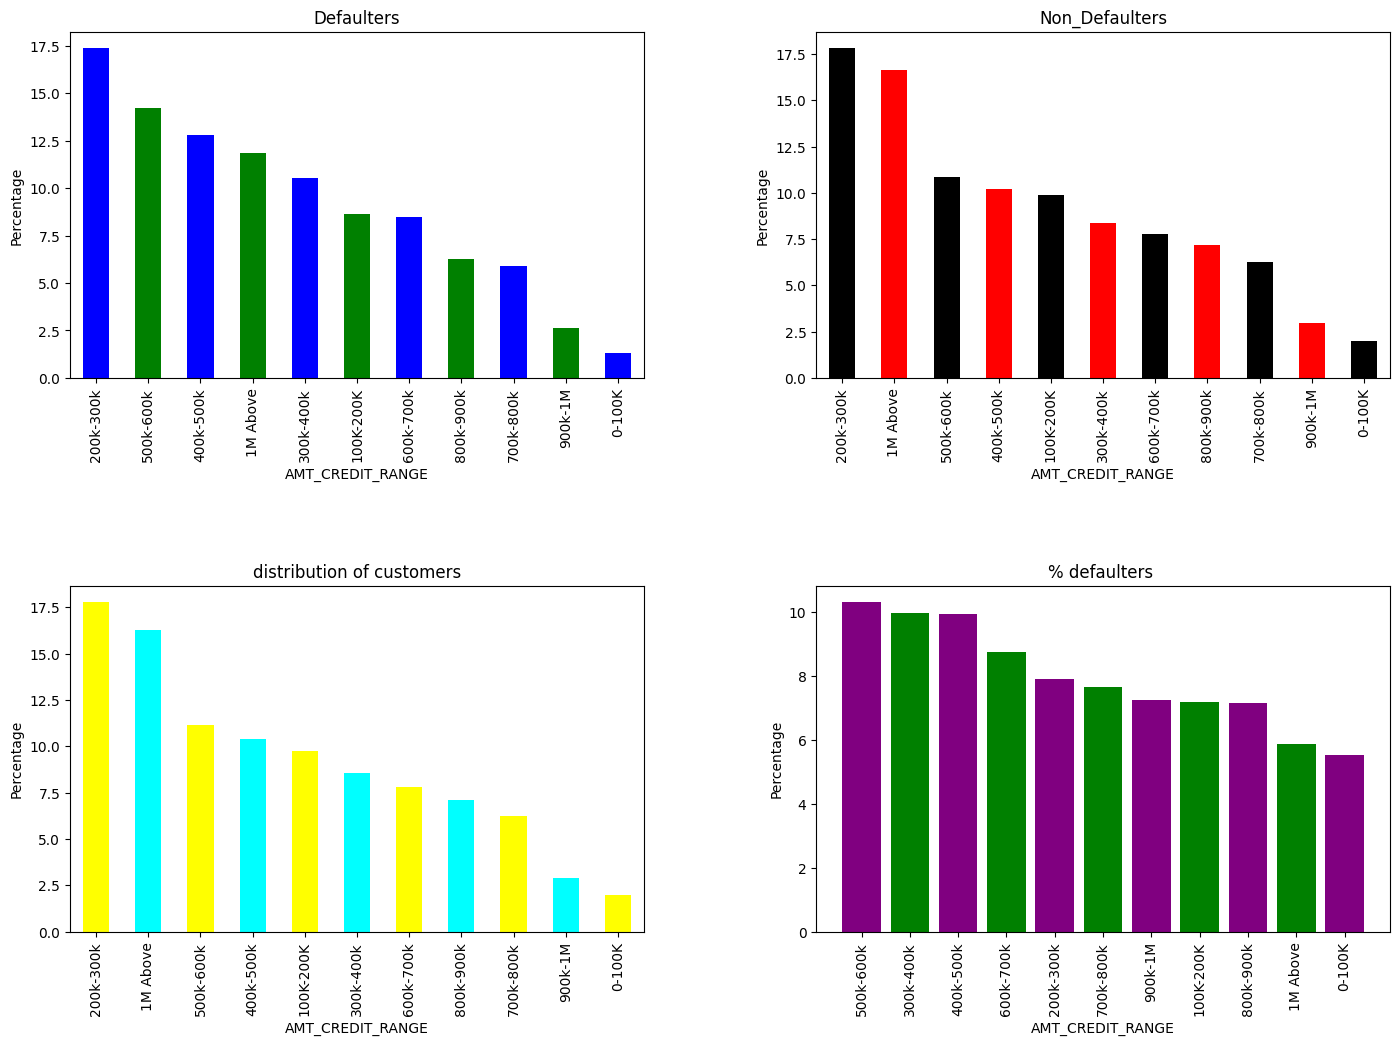

In [224]:
analysis('AMT_CREDIT_RANGE')

**1 People given loan between 300k and 700k have high possibilty to default**

**2 Most of the loans given are under 500k**

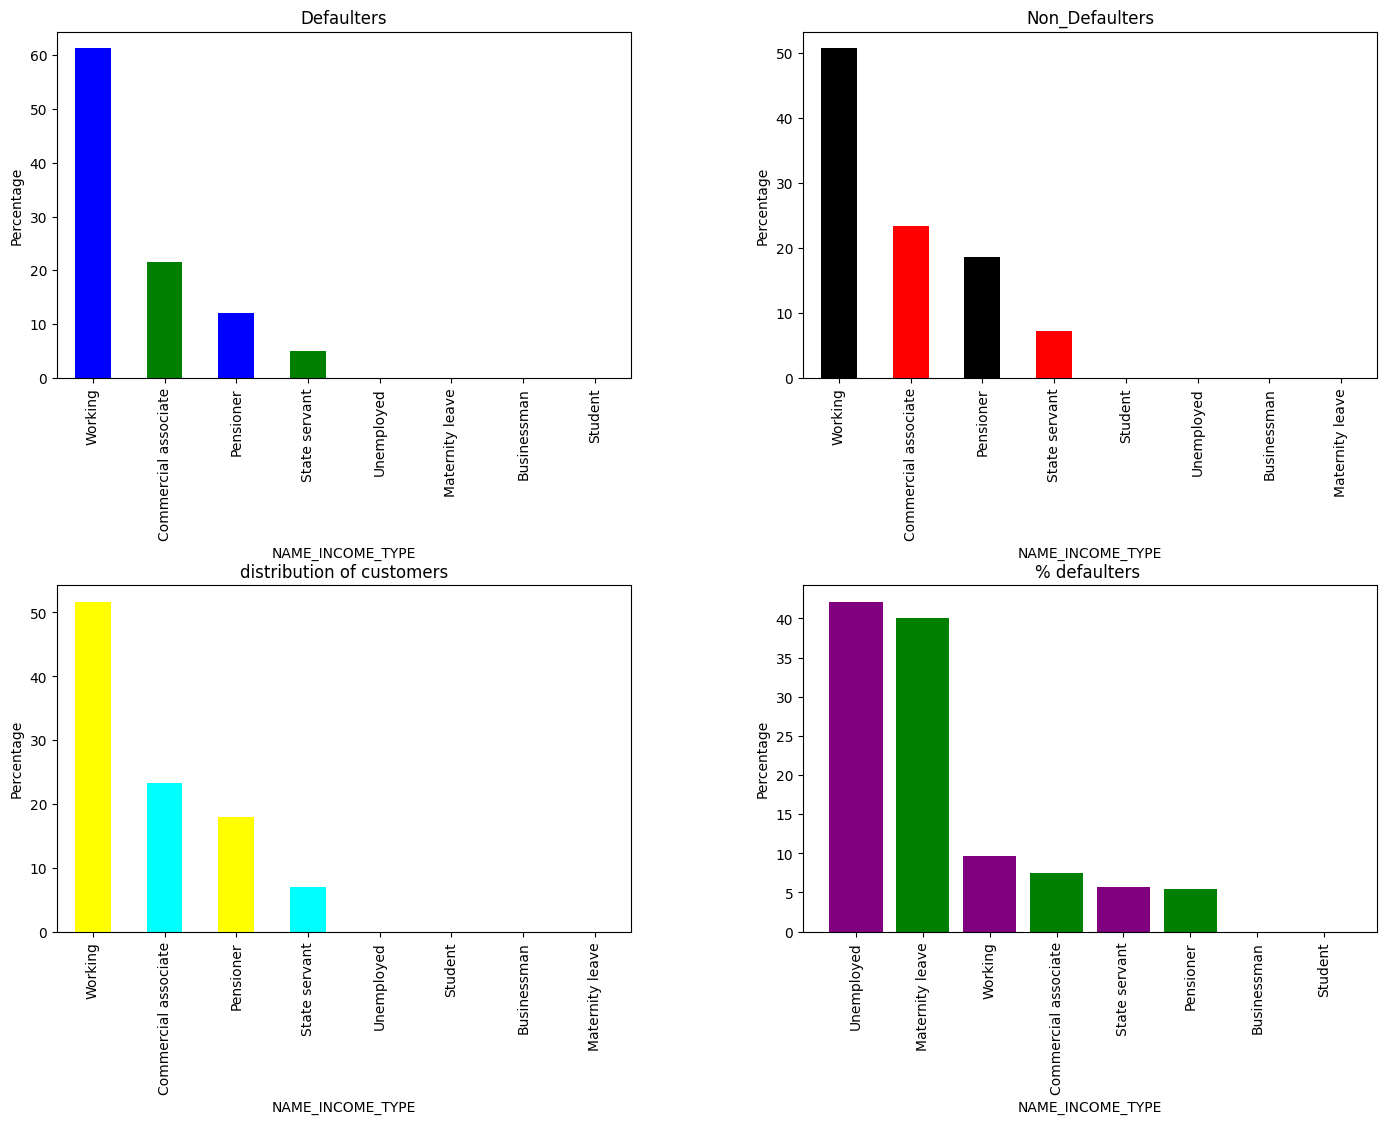

In [225]:
analysis('NAME_INCOME_TYPE')

**1 Most of the loan are given to working and commercial associates**

**2 People who are unemployed or are on maternity leave have high chances to default the payments**

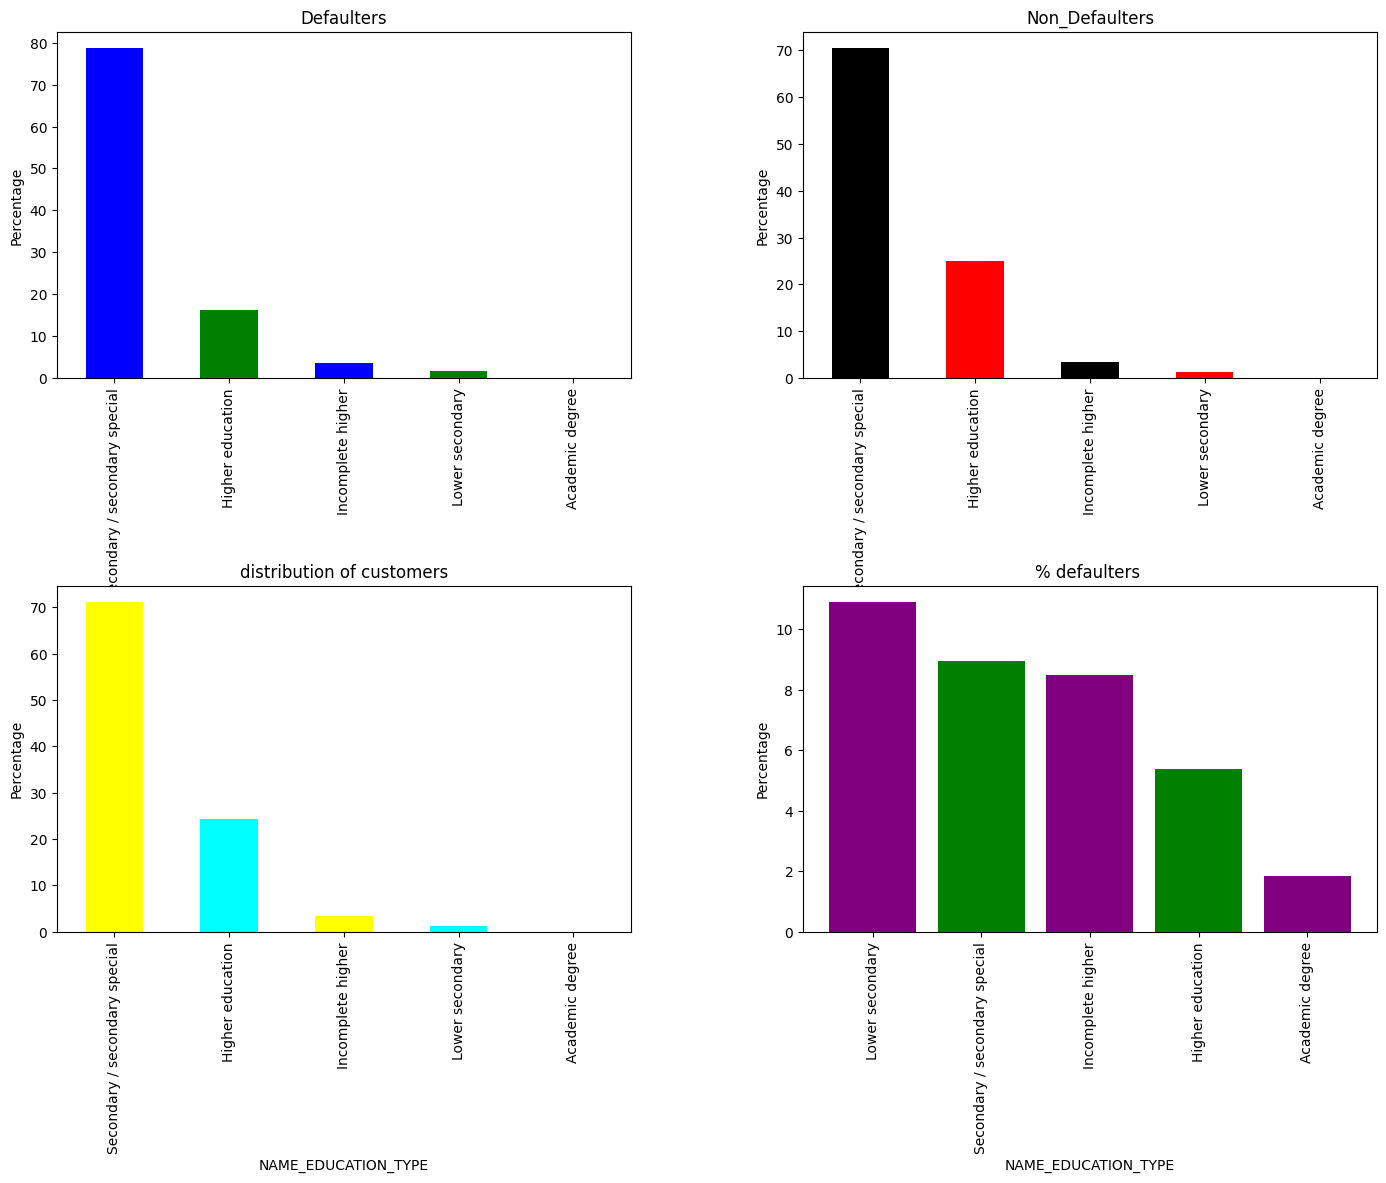

In [226]:
analysis('NAME_EDUCATION_TYPE')

**1 Most of the loan atre given to people with secondary education and higher education**

**2 People with Lower secondary education have more chances to be a defaulter**

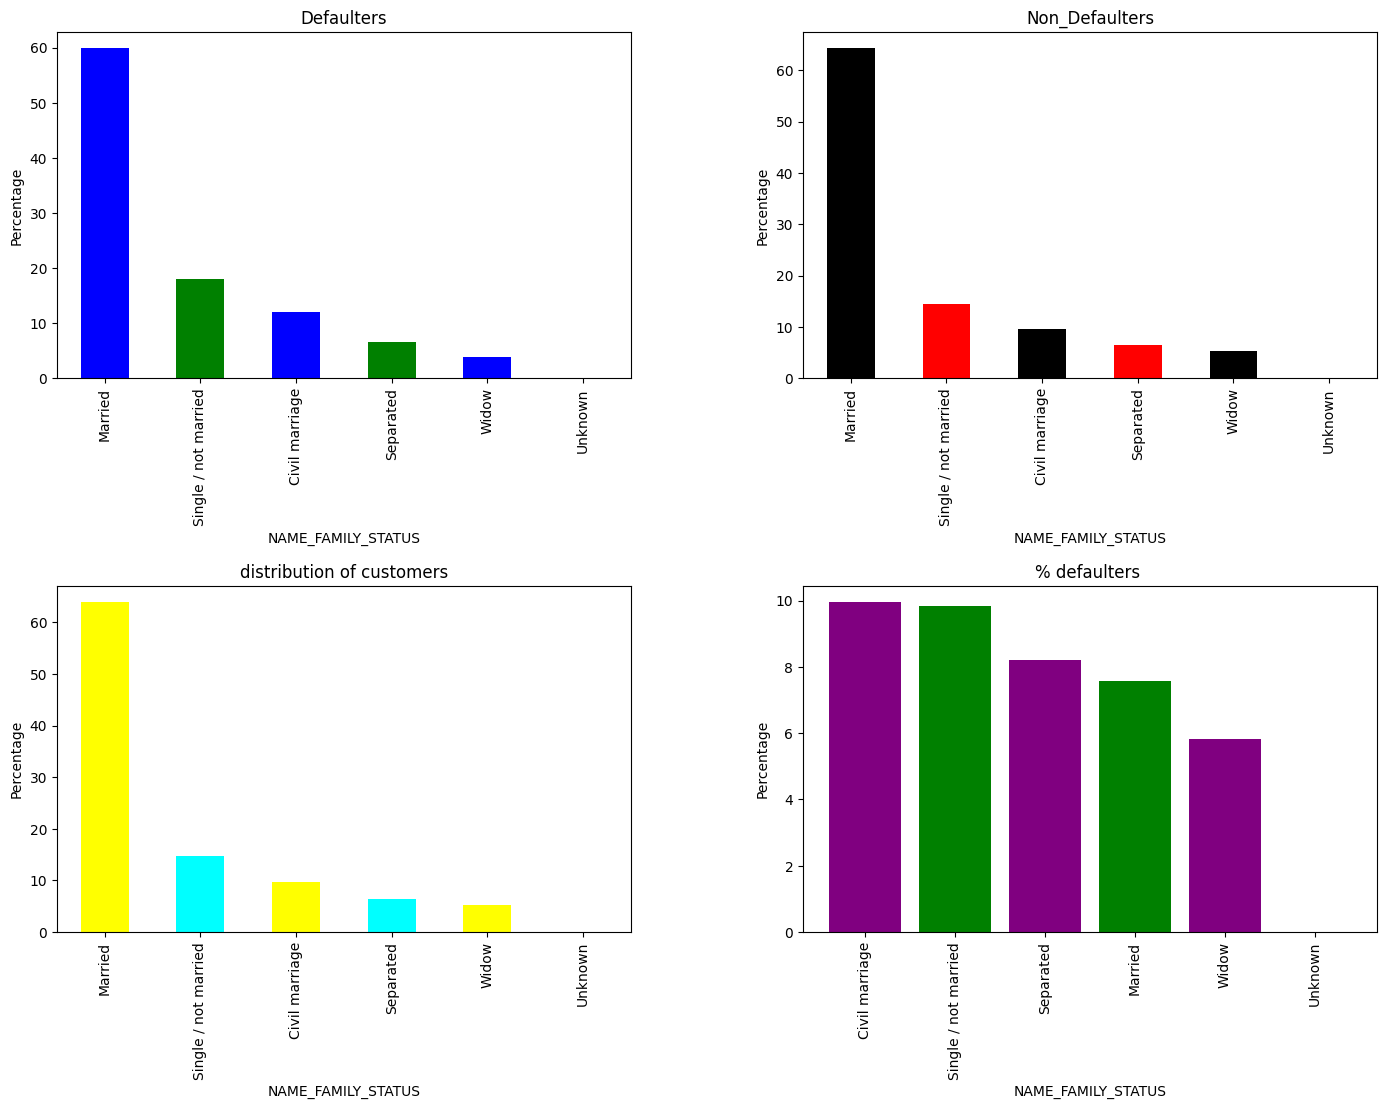

In [227]:
analysis('NAME_FAMILY_STATUS')

**1 most of the loans are given to the married people**

**2 People with civil marriage or single or seperated are more likely  to default**

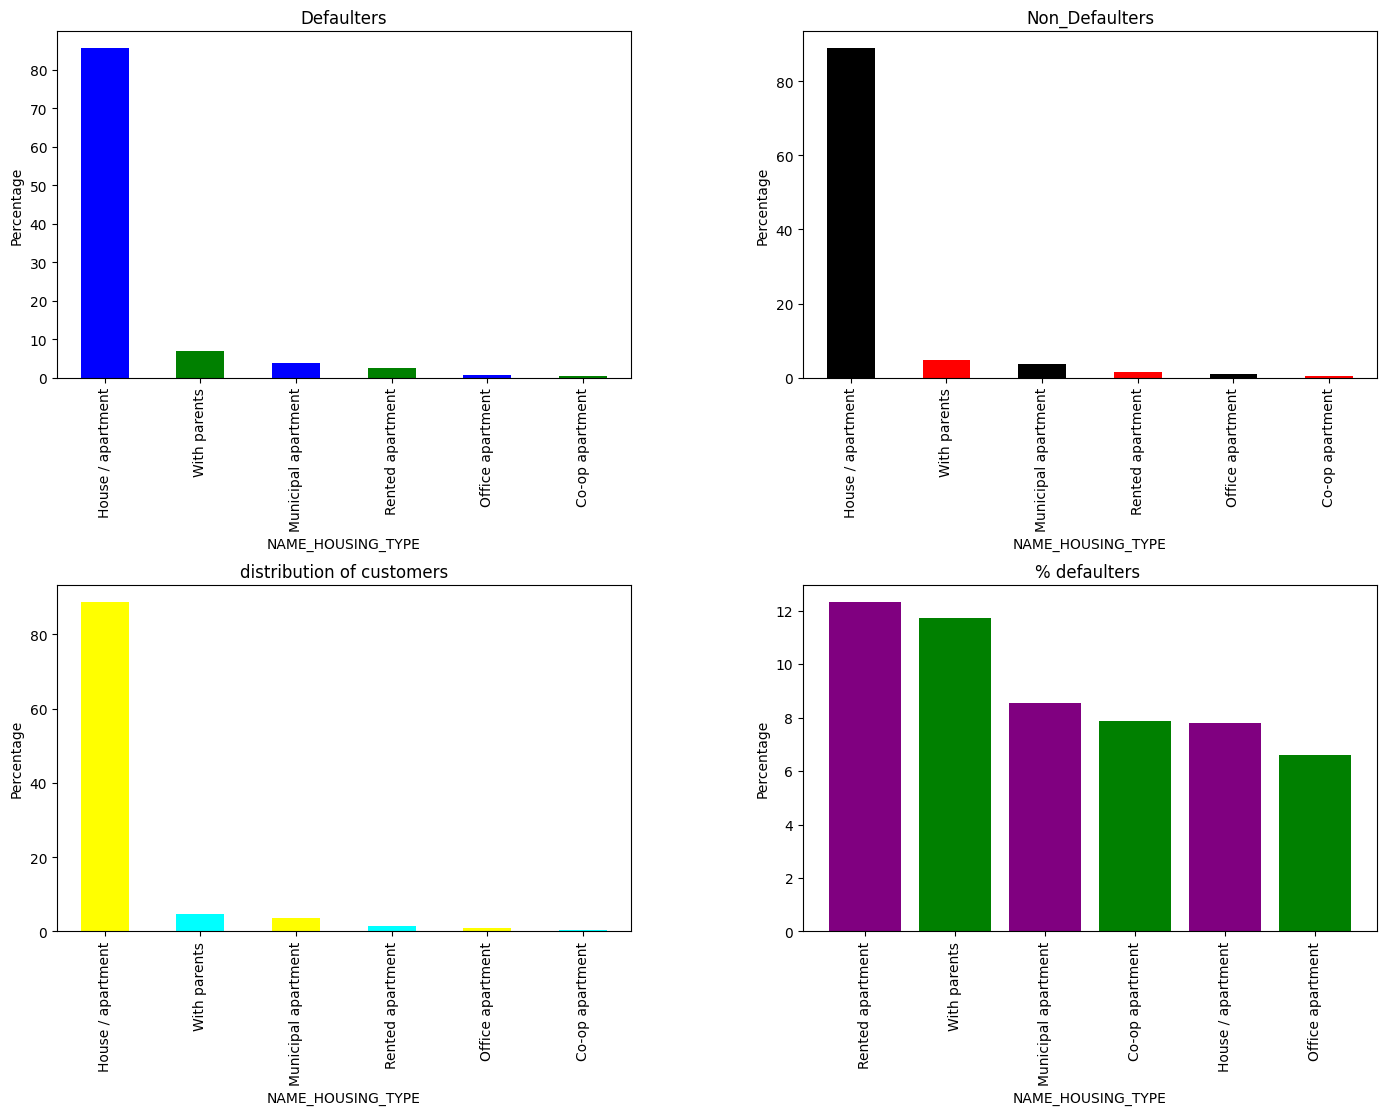

In [228]:
analysis('NAME_HOUSING_TYPE')

**1 Most of the customers with loan owns their property**

**2 People who live in rented appartments or are living with their parents likely to default a payment**

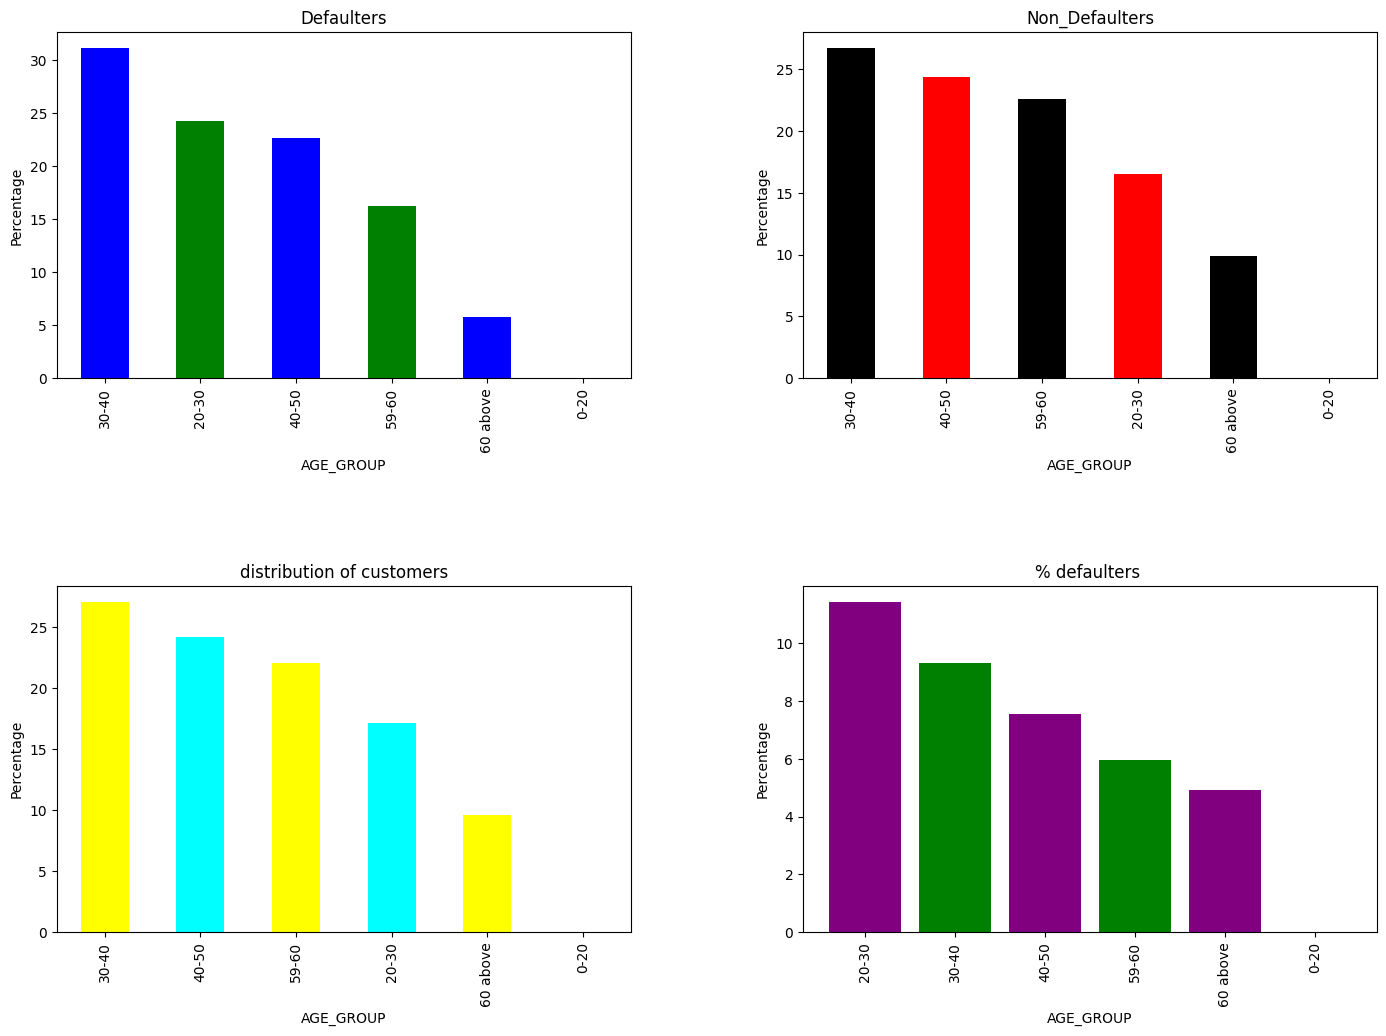

In [229]:
analysis('AGE_GROUP')

**Most of the loans are given to people within age 30-40**

**People in the age group range 20-40 have higher probability of defaulting People above age of 50 have low probability of defaulting**

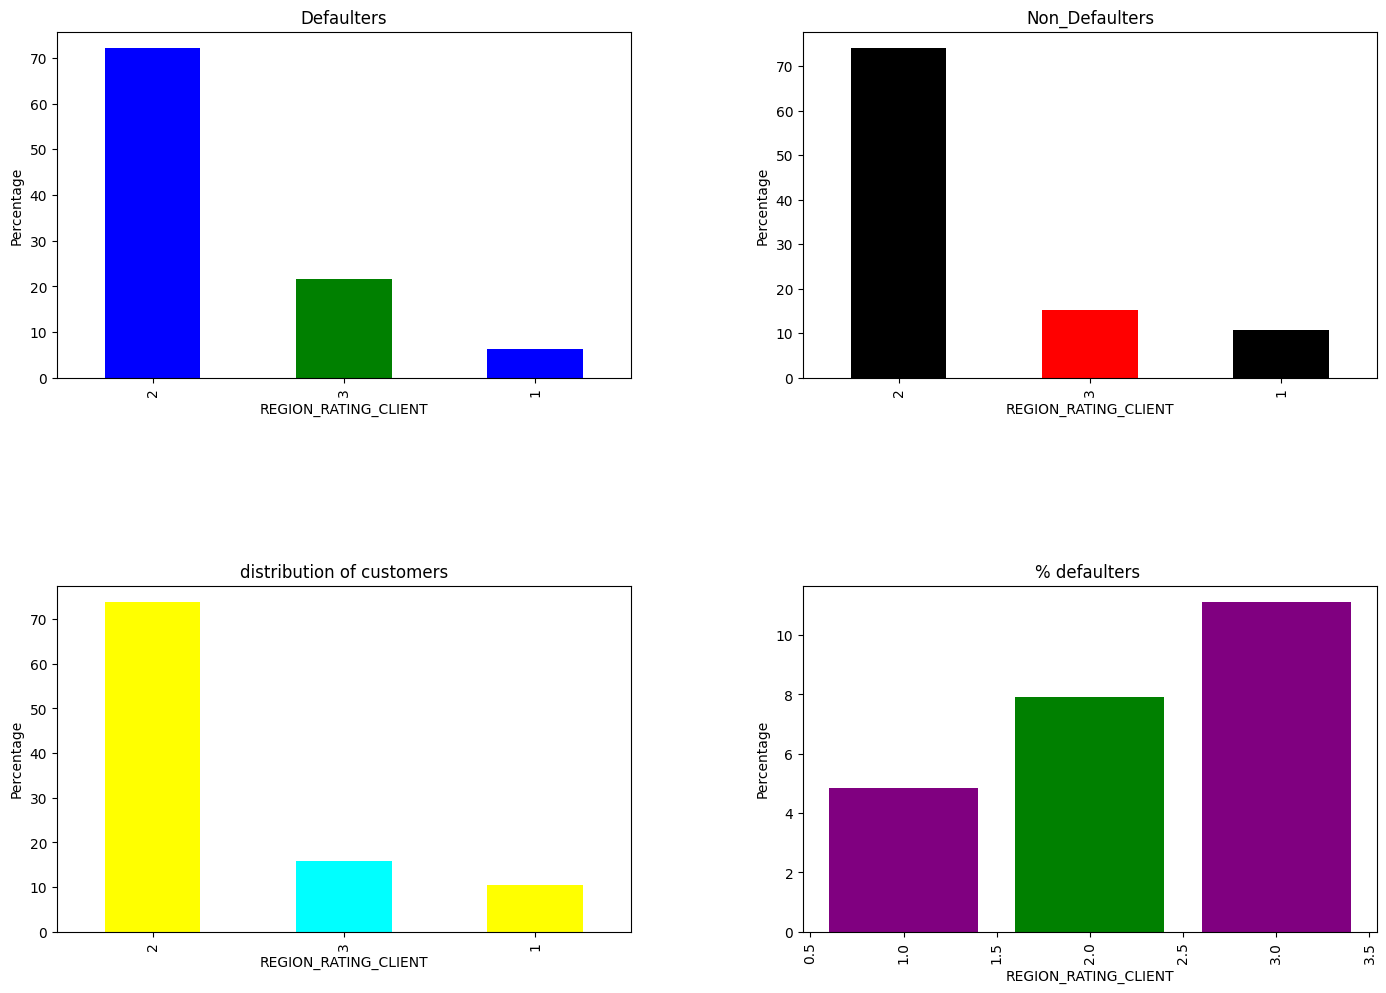

In [230]:
analysis('REGION_RATING_CLIENT')

**Most of the loans were given in region 2 but a great number of people from region 3 are defaulting**

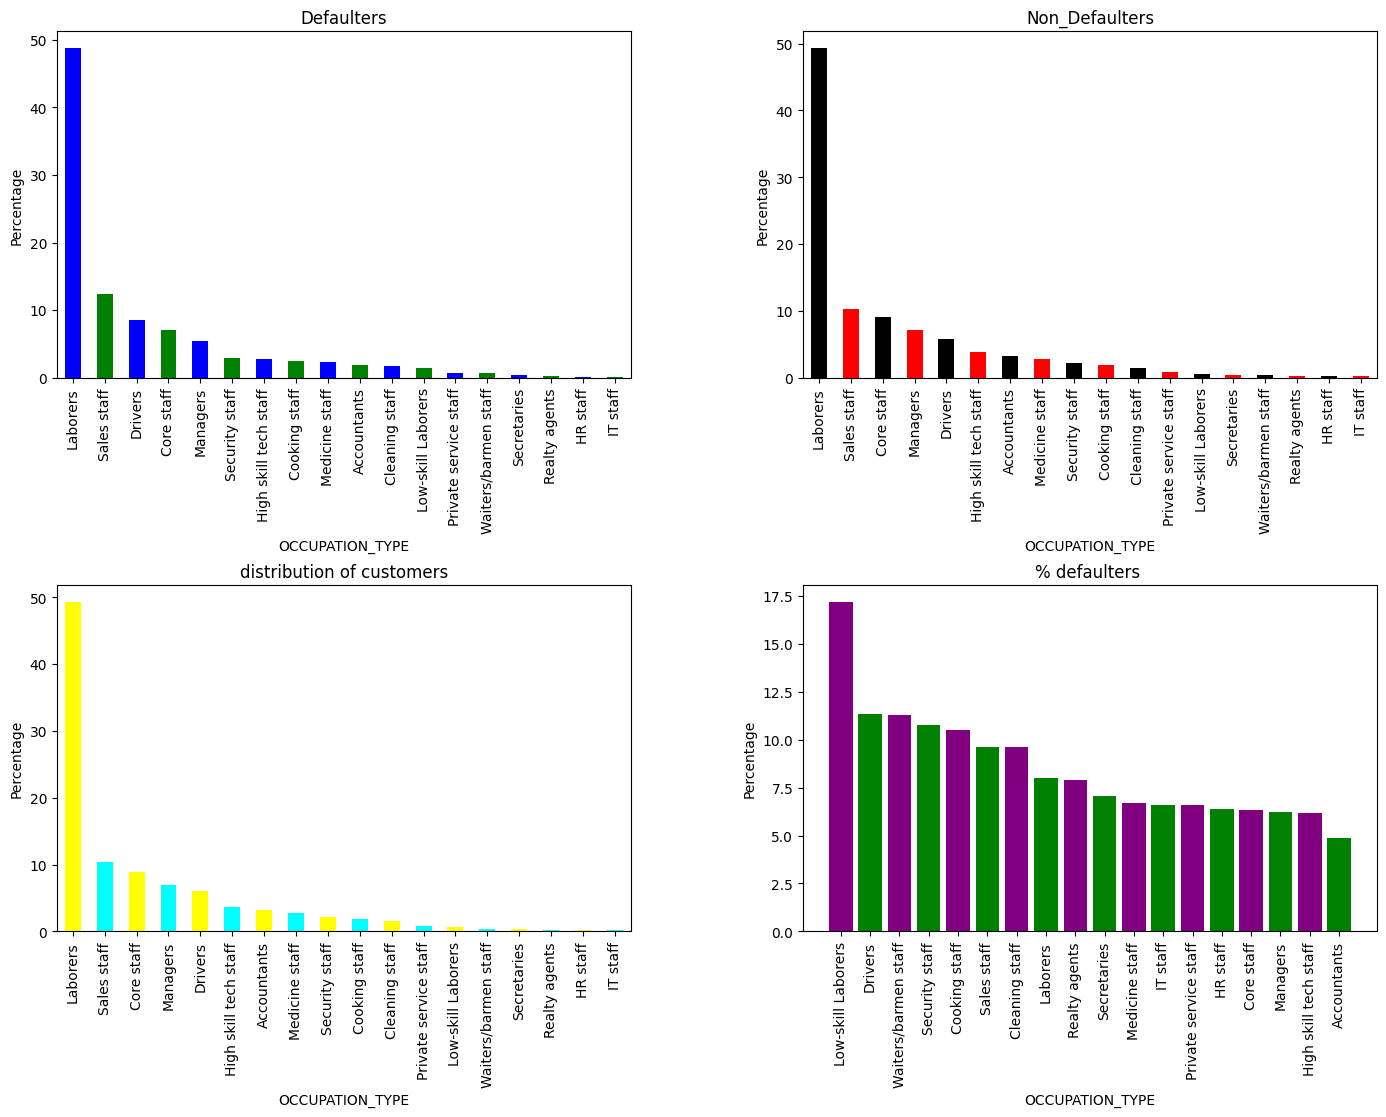

In [232]:
analysis('OCCUPATION_TYPE')

**1 Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans**

**2 Low-skill Laborers ,drivers Waiters/barmen staff, Security staff, Laborers and Cooking staff,sales staff are the highest categories to default**

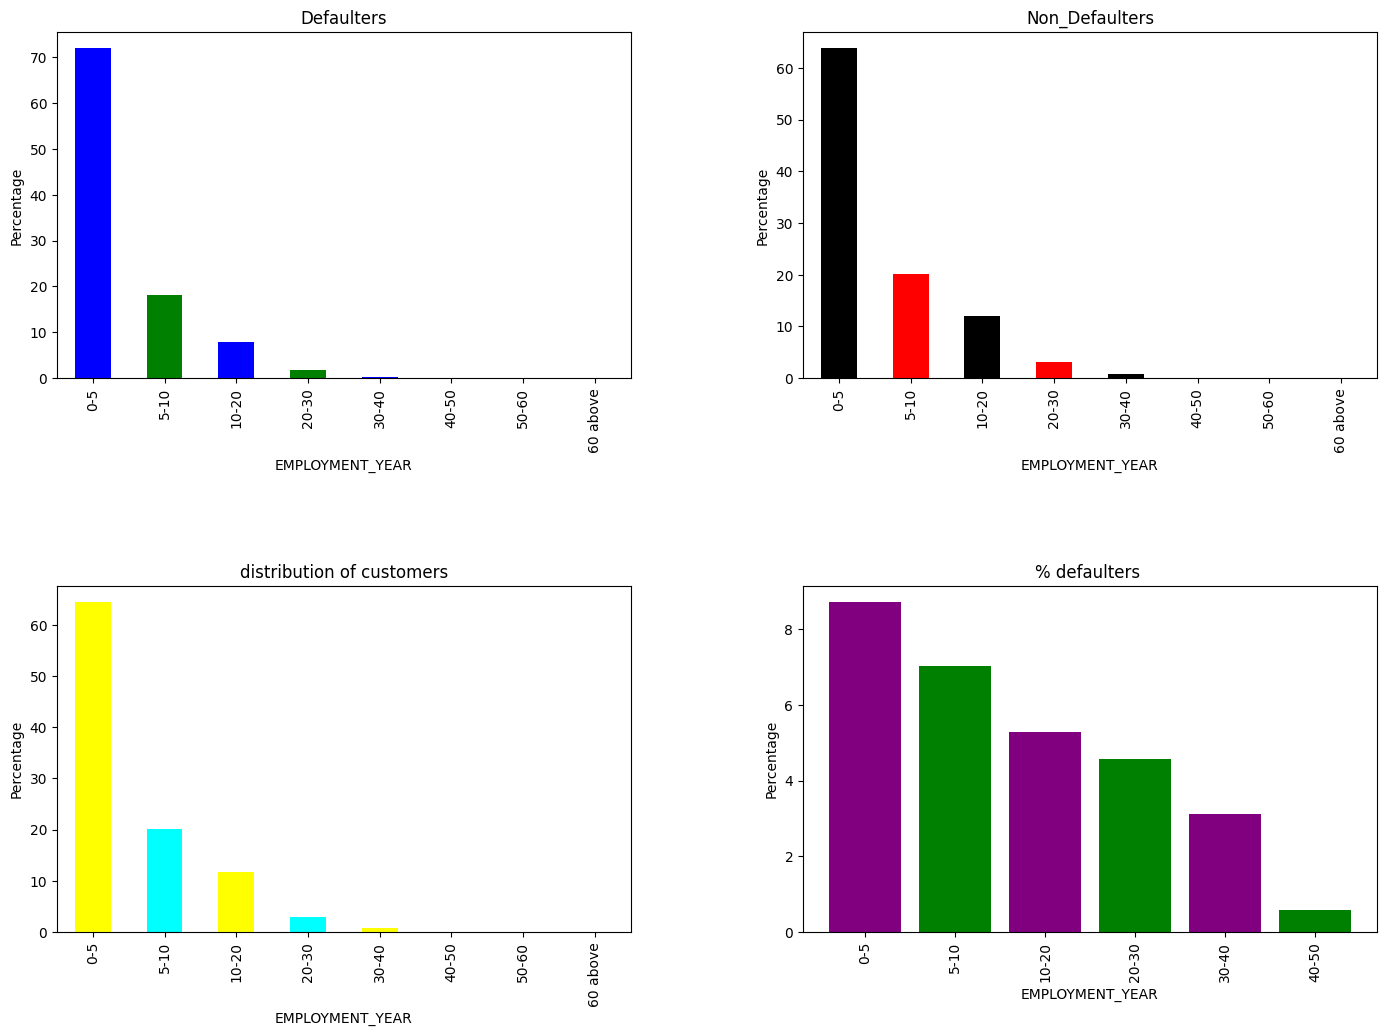

In [233]:
analysis('EMPLOYMENT_YEAR')

**1 Most of the loans are given to people in their early years of employment**

**2 More the experience less the default percentage**

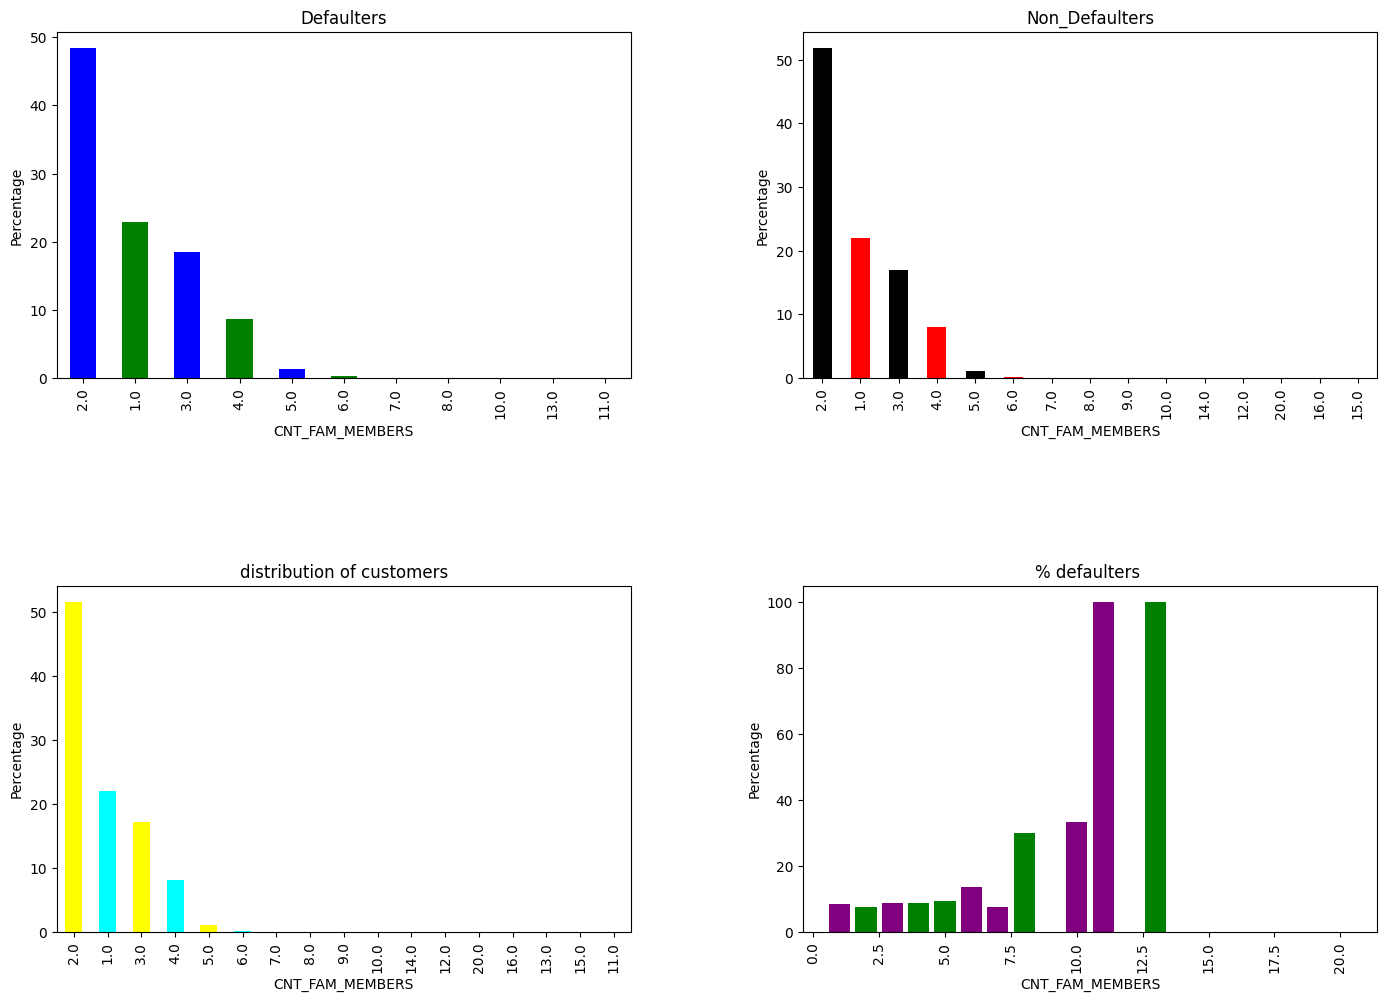

In [234]:
analysis('CNT_FAM_MEMBERS')

**1 More the number of family members more one likely to default**

**2 Most of the customers are having 2 or less than 2 kids**

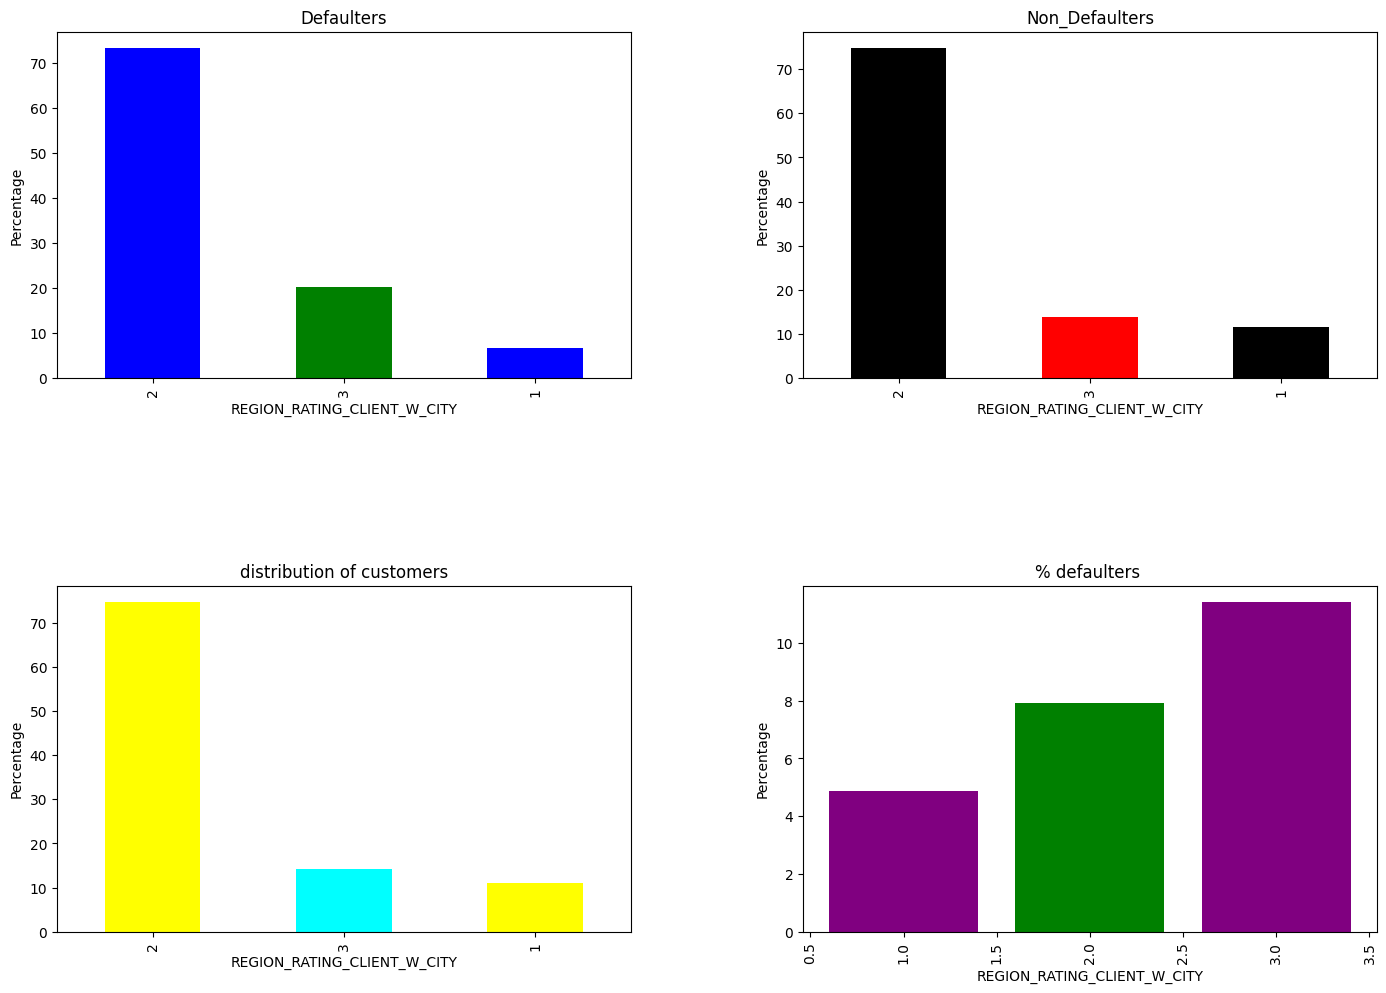

In [235]:
analysis('REGION_RATING_CLIENT_W_CITY')

****Most of the loans were given in tier 2 cities but a great number of people from tier 3 cities are defaulting****

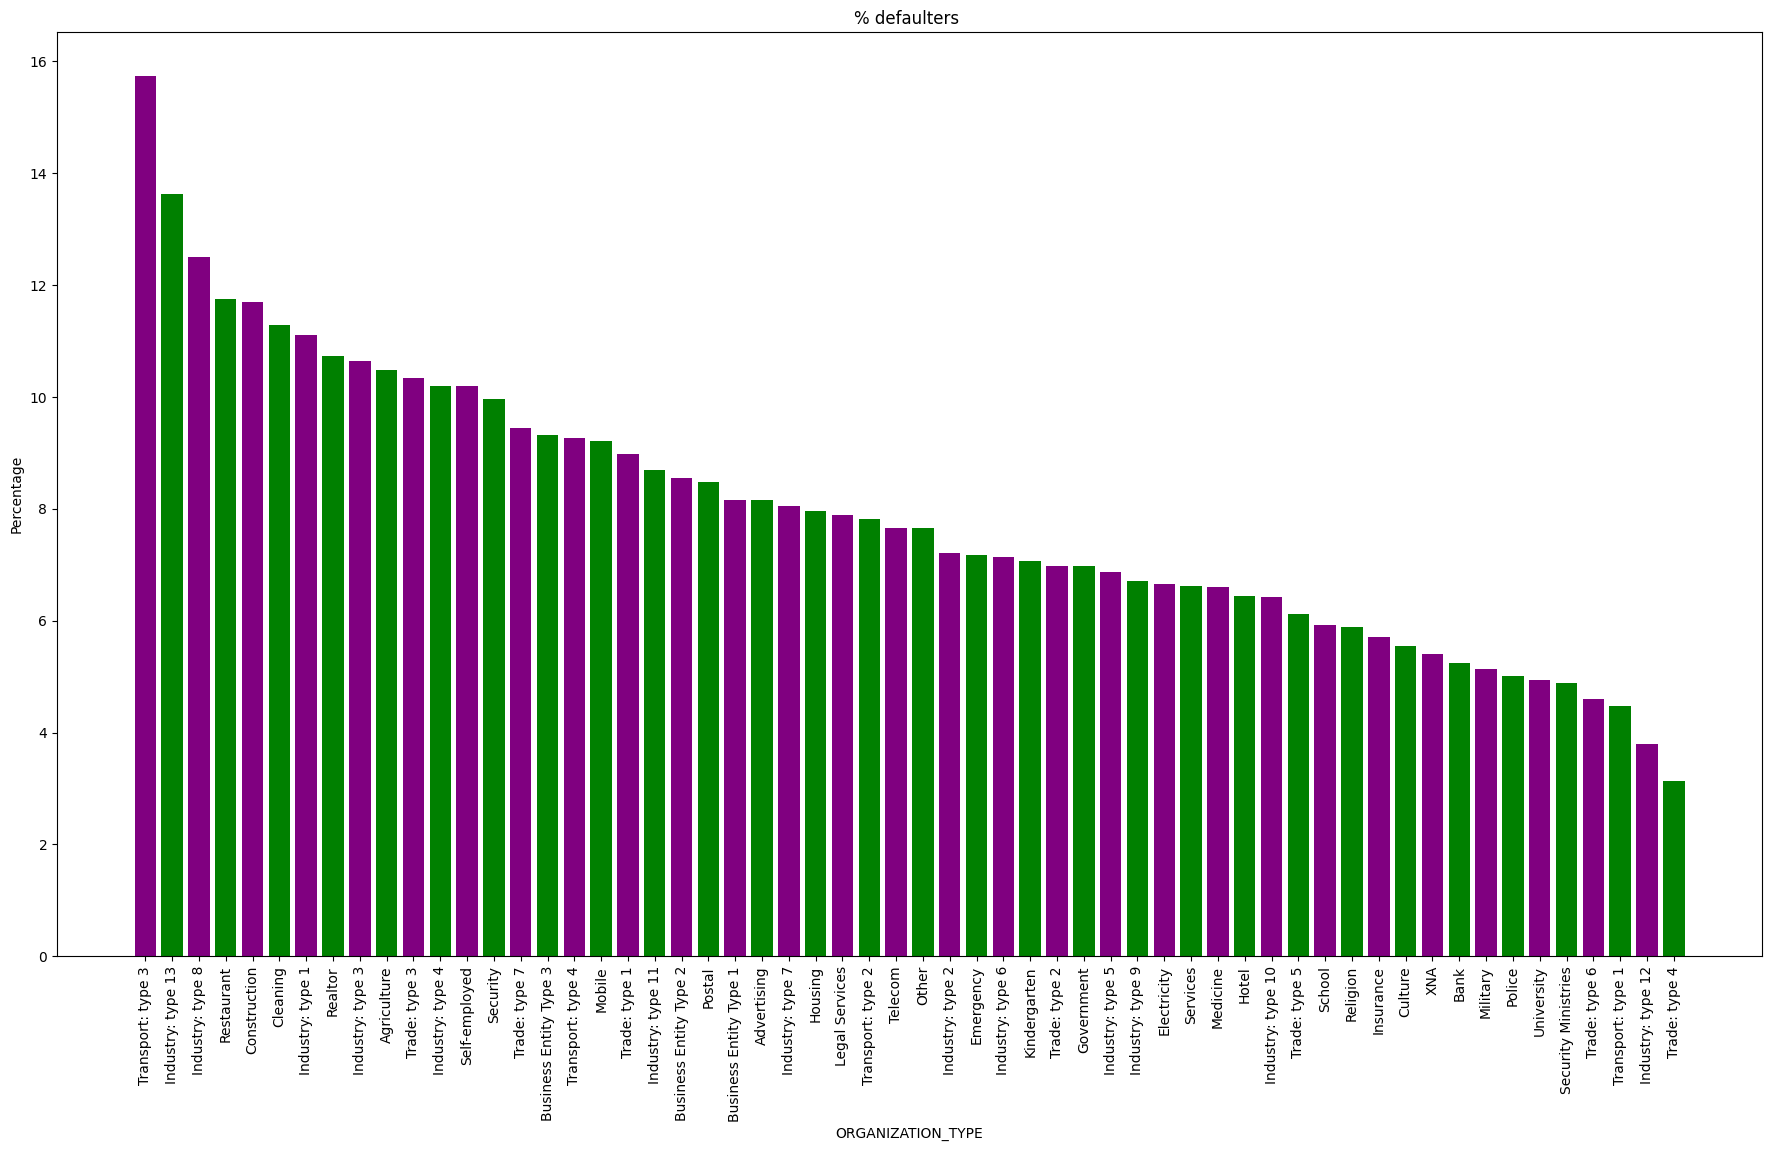

In [236]:
plt.figure(figsize=(22,12))
per_def= app_df[['ORGANIZATION_TYPE' , 'TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
per_def["TARGET"] = per_def["TARGET"]*100
per_def.sort_values(by='TARGET', ascending=False, inplace=True)

s = plt.bar('ORGANIZATION_TYPE', 'TARGET',data=per_def,color=['purple', 'green'])
plt.ylabel("Percentage")
plt.xlabel('ORGANIZATION_TYPE')
plt.title("% defaulters ")
plt.xticks(rotation=90)
plt.show()

**Organizations with highest percent of loans not repaid are Transport: type 3 , Industry: type 13 , Industry: type 8  and Restaurant**

# Multivariate analysis

**Correlation for defaulters**

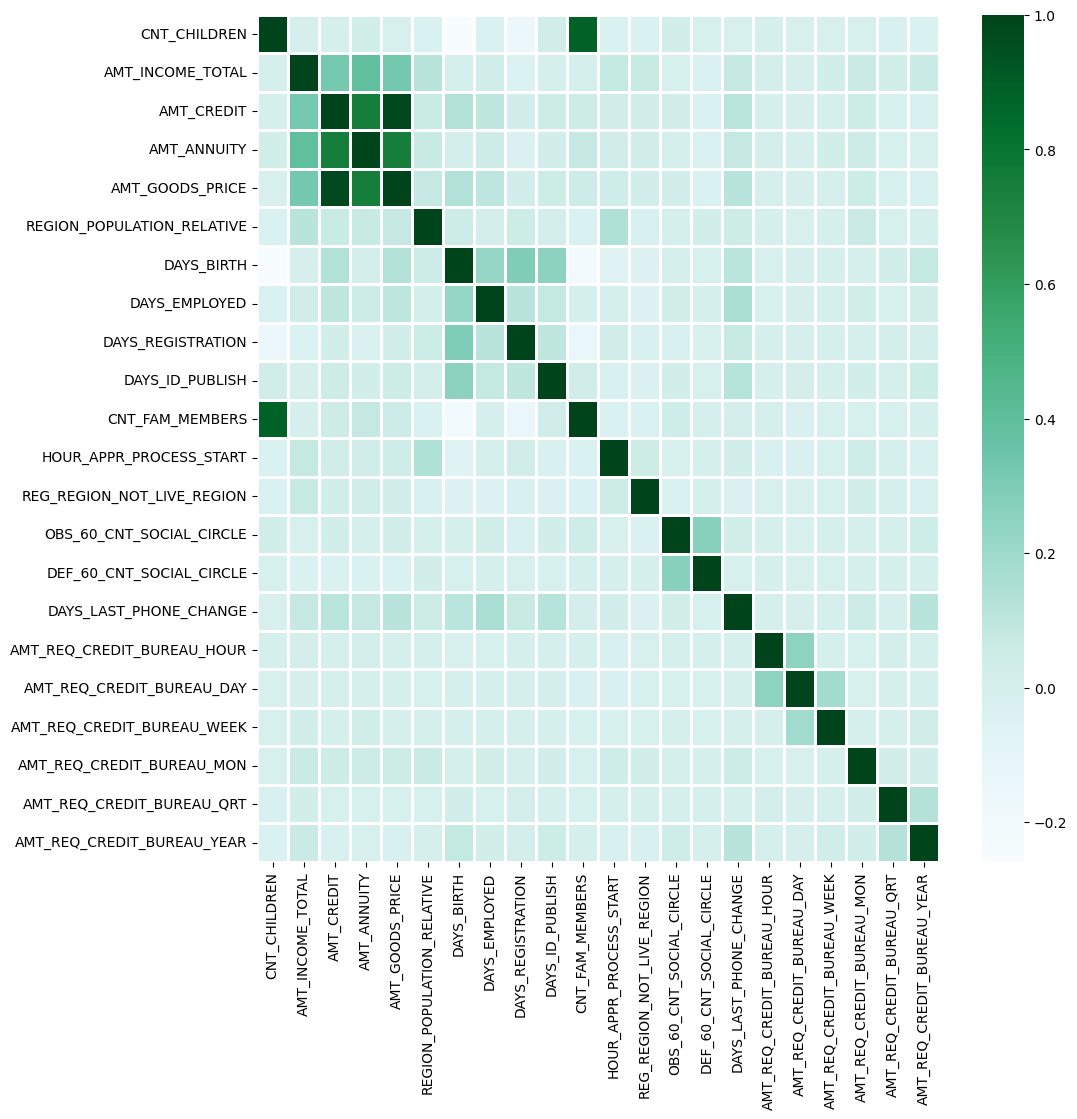

In [237]:
d=defaulters[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
plt.figure(figsize=(11,11))
sns.heatmap(d.corr(), cmap="BuGn",annot=False,linewidth =1)
plt.show()

**top 10 correlations for defaulters**

In [238]:
default=d.corr()
default_new=default.unstack().reset_index()
default_new.columns =['VAR1','VAR2','Correlation']
default_new.sort_values(by='Correlation', ascending=False, inplace=True)
default_new.iloc[22:32,:]

VAR1              VAR2  Correlation
90    AMT_GOODS_PRICE        AMT_CREDIT     0.982778
48         AMT_CREDIT   AMT_GOODS_PRICE     0.982778
220   CNT_FAM_MEMBERS      CNT_CHILDREN     0.885533
10       CNT_CHILDREN   CNT_FAM_MEMBERS     0.885533
70        AMT_ANNUITY   AMT_GOODS_PRICE     0.752038
91    AMT_GOODS_PRICE       AMT_ANNUITY     0.752038
47         AMT_CREDIT       AMT_ANNUITY     0.751858
68        AMT_ANNUITY        AMT_CREDIT     0.751858
25   AMT_INCOME_TOTAL       AMT_ANNUITY     0.398230
67        AMT_ANNUITY  AMT_INCOME_TOTAL     0.398230

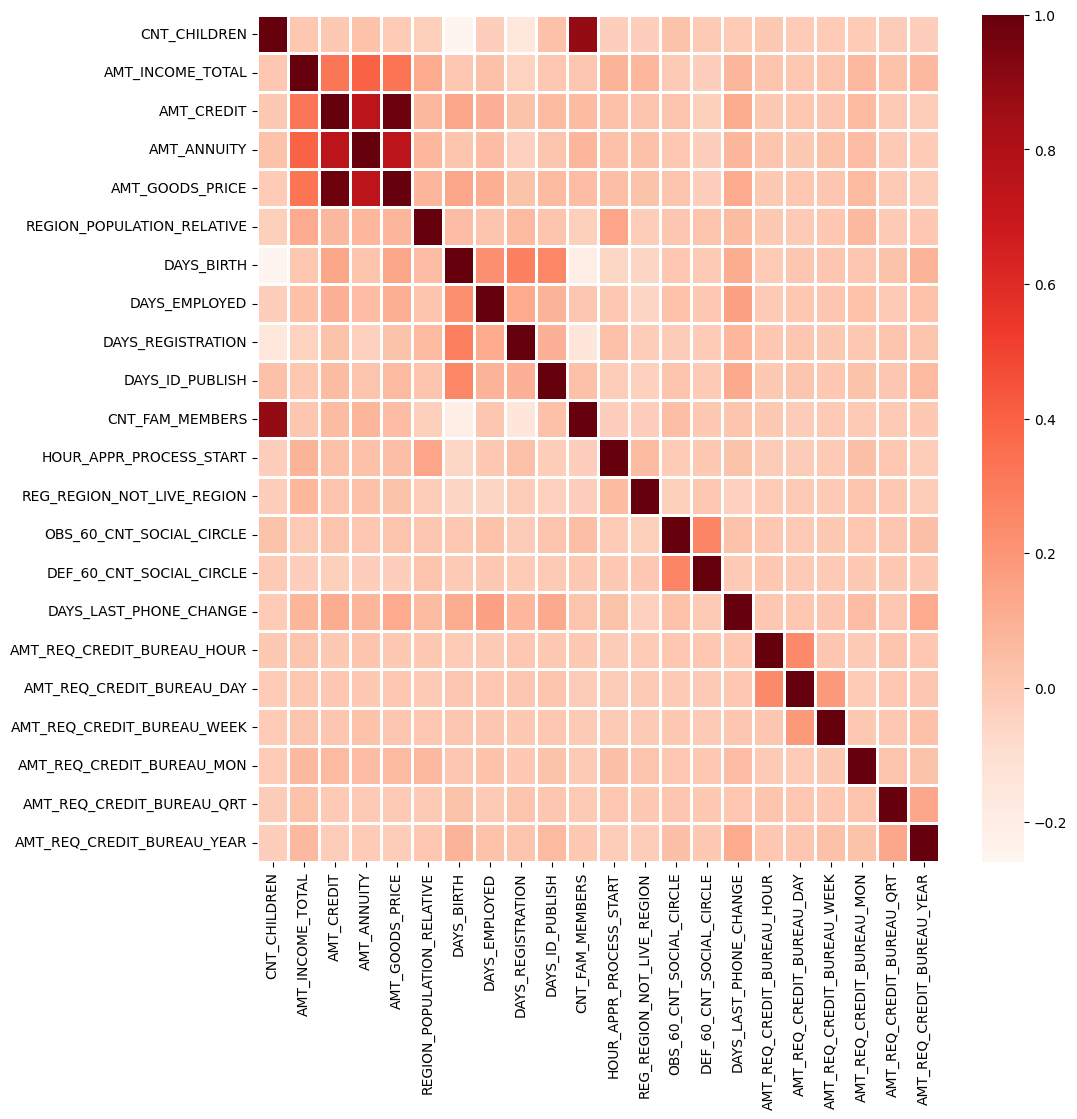

In [239]:
non_def=defaulters[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
plt.figure(figsize=(11,11))
sns.heatmap(non_def.corr(), cmap="Reds",annot=False,linewidth =1)
plt.show()

**top 10 correlations for non_defaulters**

In [241]:
non_default=non_def.corr()
non_default_new=non_default.unstack().reset_index()
non_default_new.columns =['VAR1','VAR2','Correlation']
non_default_new.sort_values(by='Correlation', ascending=False, inplace=True)
non_default_new.iloc[22:32,:]

VAR1              VAR2  Correlation
90    AMT_GOODS_PRICE        AMT_CREDIT     0.982778
48         AMT_CREDIT   AMT_GOODS_PRICE     0.982778
220   CNT_FAM_MEMBERS      CNT_CHILDREN     0.885533
10       CNT_CHILDREN   CNT_FAM_MEMBERS     0.885533
70        AMT_ANNUITY   AMT_GOODS_PRICE     0.752038
91    AMT_GOODS_PRICE       AMT_ANNUITY     0.752038
47         AMT_CREDIT       AMT_ANNUITY     0.751858
68        AMT_ANNUITY        AMT_CREDIT     0.751858
25   AMT_INCOME_TOTAL       AMT_ANNUITY     0.398230
67        AMT_ANNUITY  AMT_INCOME_TOTAL     0.398230

In [242]:
new=pd.pivot_table(data=app_df,index='NAME_EDUCATION_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

**Education vs marital staus**

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='NAME_EDUCATION_TYPE'>

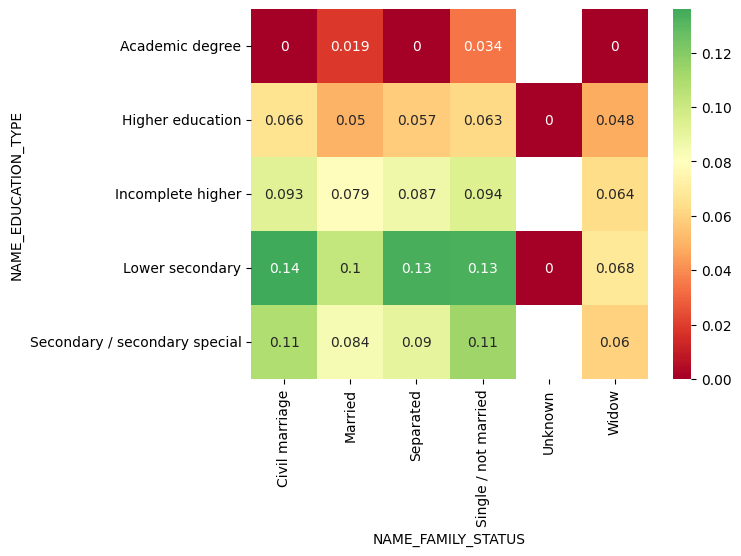

In [243]:
sns.heatmap(new,annot=True, cmap='RdYlGn',center=0.08)

**People with civil marriage and lower Sc eductaion likely to default more followed by lower Sc seperated and single people**

**Marital status vs Accompany**

In [244]:
new1=pd.pivot_table(data=app_df,index='NAME_TYPE_SUITE',columns='NAME_FAMILY_STATUS',values='TARGET')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='NAME_TYPE_SUITE'>

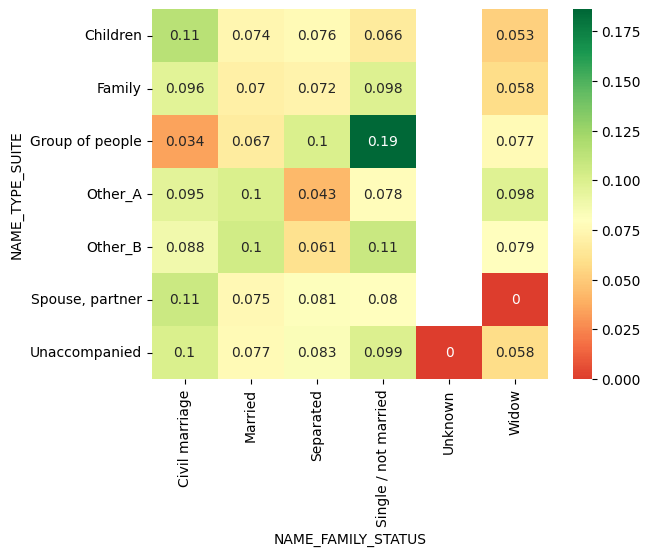

In [245]:
sns.heatmap(new1,annot=True, cmap='RdYlGn',center=0.08)

**Single people who are accompanied by the group of people in loan application are likely to default more**

**Occupation vs Marital status**

In [246]:
new3=pd.pivot_table(data=app_df,index='OCCUPATION_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='OCCUPATION_TYPE'>

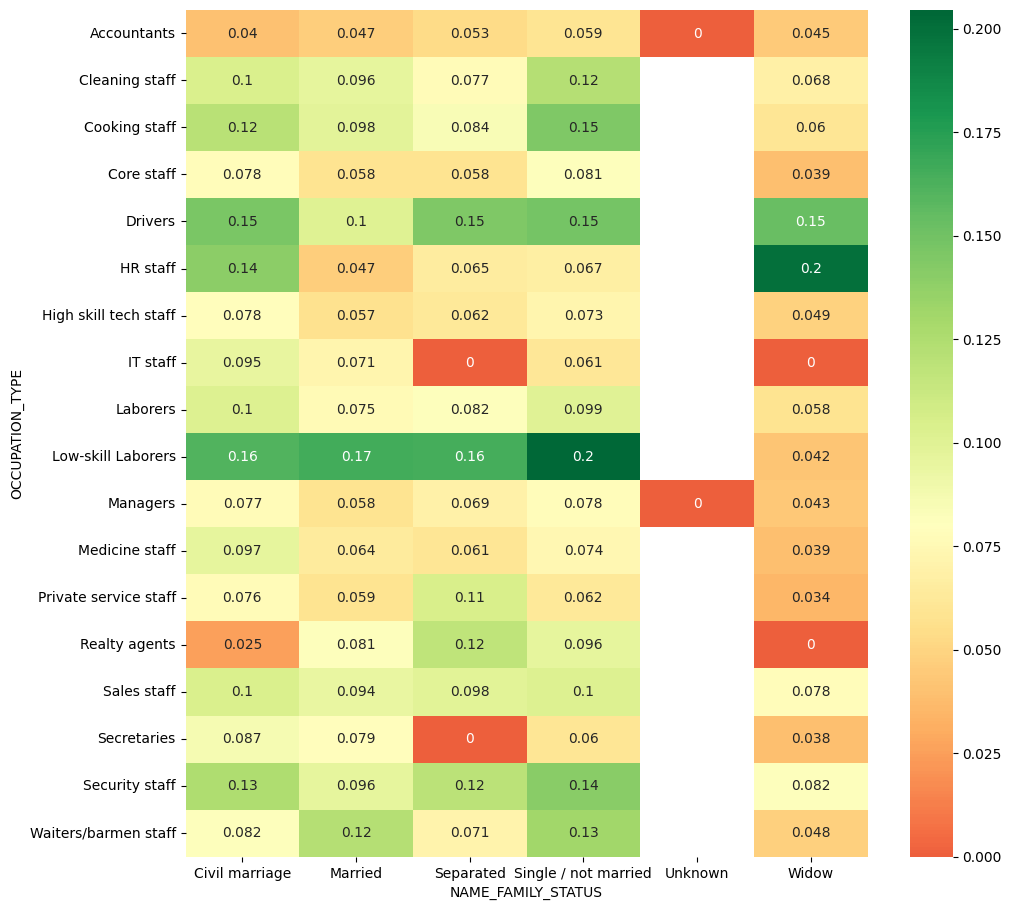

In [247]:
plt.figure(figsize=(11,11))
sns.heatmap(new3,annot=True, cmap='RdYlGn',center=0.08)

**Single,low skilled labours and widowed HR staff are likely to default More**

**Income type vs Marital status**

In [248]:
new4=pd.pivot_table(data=app_df,index='NAME_INCOME_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='NAME_INCOME_TYPE'>

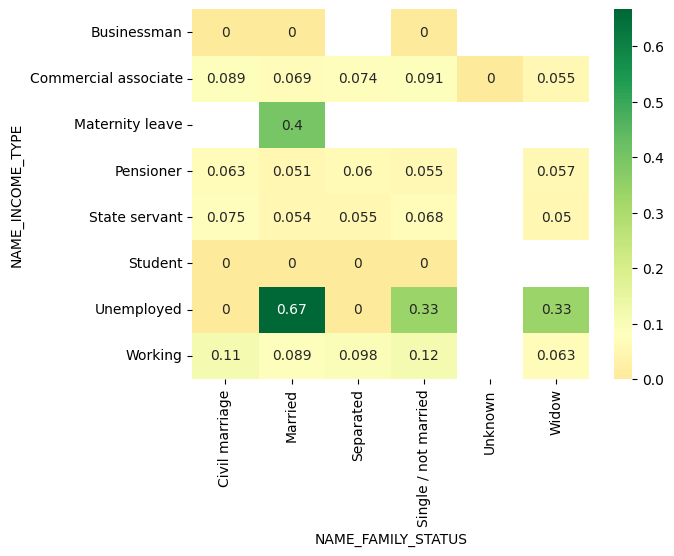

In [249]:

sns.heatmap(new4,annot=True, cmap='RdYlGn',center=0.08)


**Married unemployed are likely to default most**

**Property vs Marital Status**

In [250]:
new5=pd.pivot_table(data=app_df,index='NAME_HOUSING_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='NAME_HOUSING_TYPE'>

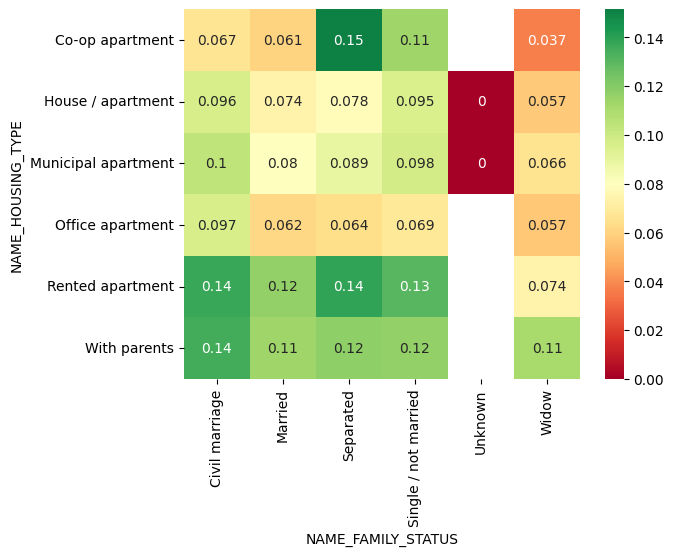

In [251]:
sns.heatmap(new5,annot=True, cmap='RdYlGn',center=0.08)

**People living in co-op appartements and are seperated are likely to default the loan followed by seperated and civil marriage living in rented appartements**

**Region VS Marital Status**

In [252]:
new6=pd.pivot_table(data=app_df,index='REGION_RATING_CLIENT',columns='NAME_FAMILY_STATUS',values='TARGET')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='REGION_RATING_CLIENT'>

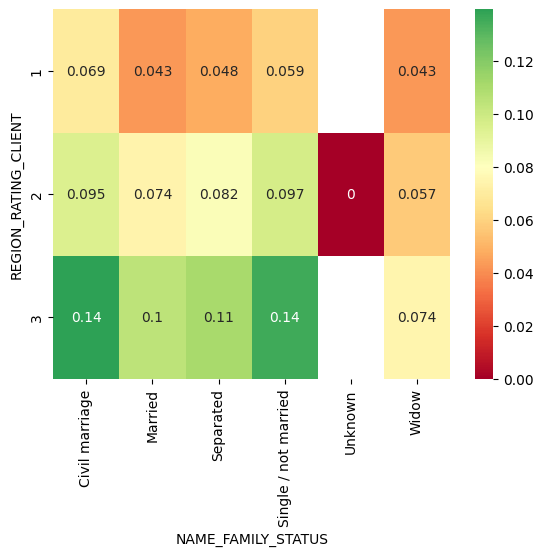

In [253]:
sns.heatmap(new6,annot=True, cmap='RdYlGn',center=0.08)

**People living in region 3 and are single or having civil marriage are likely to default**

**Region vs Education**

In [254]:
new7=pd.pivot_table(data=app_df,index='REGION_RATING_CLIENT',columns='NAME_EDUCATION_TYPE',values='TARGET')

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='REGION_RATING_CLIENT'>

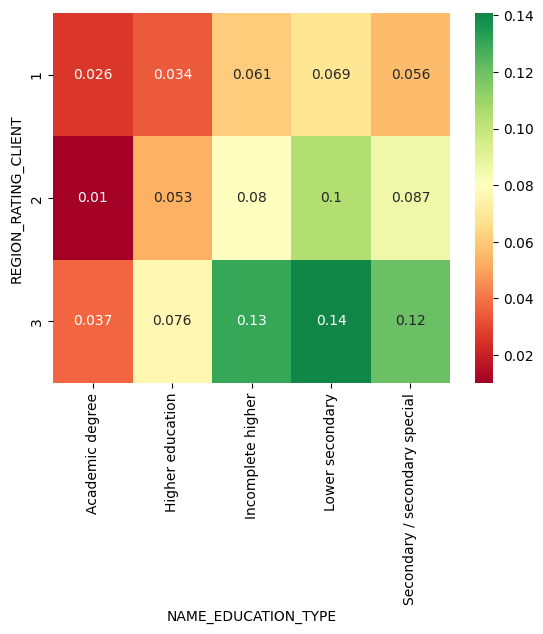

In [255]:
sns.heatmap(new7,annot=True, cmap='RdYlGn',center=0.08)

**People living in region 3 and having lower Sc education are  are likely to default follwed by people in the same region who havn't completed their higer education**

**Property vs Education**

In [256]:
new8=pd.pivot_table(data=app_df,index='NAME_HOUSING_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_HOUSING_TYPE'>

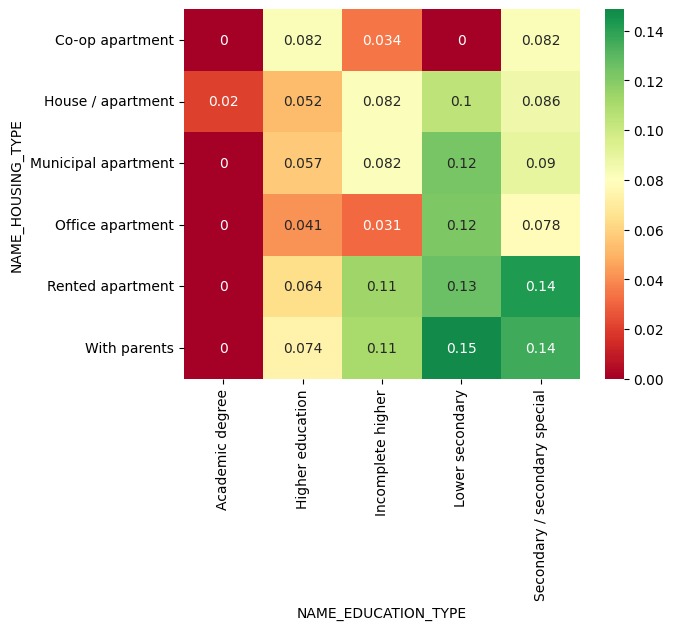

In [257]:
sns.heatmap(new8,annot=True, cmap='RdYlGn',center=0.08)

**People living with their parents and having lower Sc education are  are likely to default follwed by people  havn't compled their higer education**

**Income Type vs Education**

In [258]:
new9=pd.pivot_table(data=app_df,index='NAME_INCOME_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_INCOME_TYPE'>

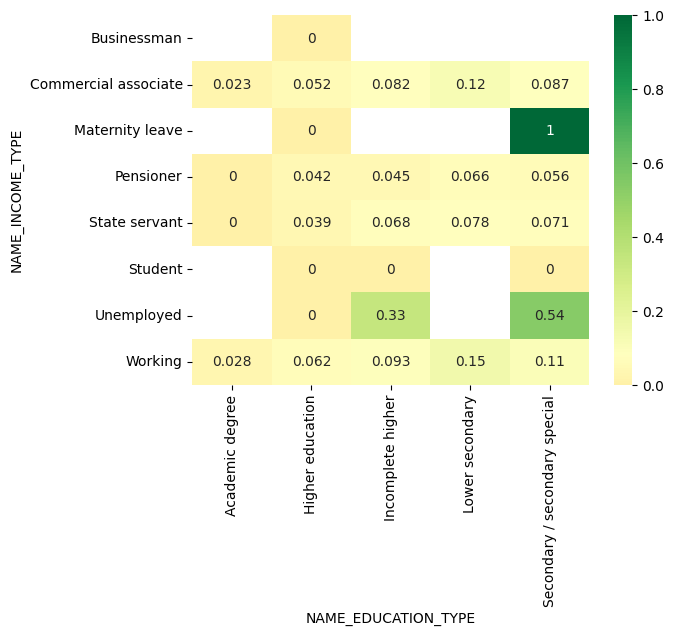

In [259]:
sns.heatmap(new9,annot=True, cmap='RdYlGn',center=0.08)

**Occupation vs Education**

In [260]:
new10=pd.pivot_table(data=app_df,index='OCCUPATION_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='OCCUPATION_TYPE'>

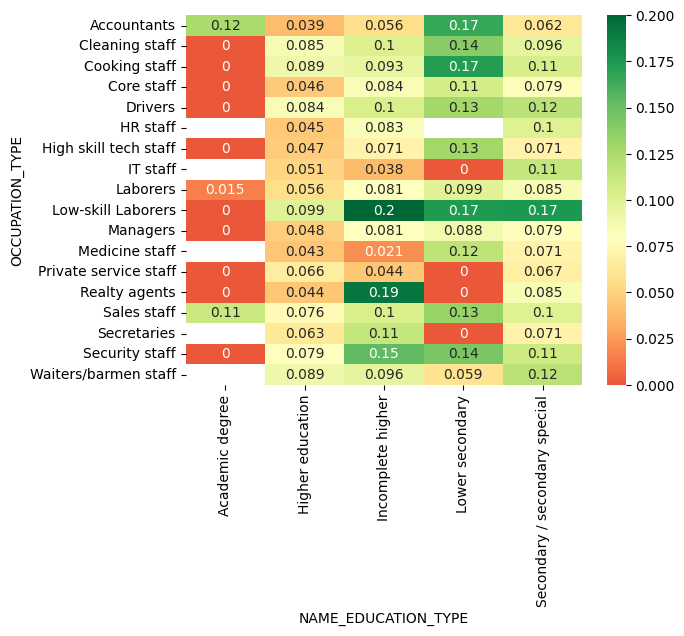

In [261]:
sns.heatmap(new10,annot=True, cmap='RdYlGn',center=0.08)

**Lets analyise the Previous application dataframe**

In [262]:
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [263]:
# dropping the columns with null data
pre_df=pre_df.drop(pre_df[pre_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_df=pre_df.drop(pre_df[pre_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

**Lets merge the datframe**

In [264]:
# merging two data
final =pd.merge(left=app_df,right=pre_df,how='inner',on='SK_ID_CURR')

In [265]:
# evaluating the shape of merged data
final.shape

(59306, 78)

In [266]:
final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             0.900      1.800000   
1               Y             0             2.925      6.658920   
2               N             1             3.600      7.333155   
3               Y             0             1.800      5.400000   
4               Y             0             1.800      5.400000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         9000.0           180000.0   Unaccompanied               Working   
1        24592.5           477000.0   Unaccompanied  Commercial associate   
2        39069.0           679500.0   Unaccompanied  Commercial associate   
3        27000.0           540000.0   Unaccompanied               Working   
4        27000.0           540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755       10341         1010.0             4799.0   
1                    0.025164       15280         2668.0             5266.0   
2                    0.015221       11694         2060.0             3557.0   
3                    0.025164       16126         1761.0             8236.0   
4                    0.025164       16126         1761.0             8236.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE OCCUPATION_TYPE  \
0             3015           1               1        Laborers   
1             3787           1               1        Laborers   
2             3557           1               1         Drivers   
3             4292           1               1        Managers   
4             4292           1               1        Managers   

   CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0              1.0                    2                           2   
1              2.0                    2                           2   
2              3.0                    2                           2   
3              2.0                    2                           2   
4              2.0                    2                           2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      TUESDAY                         16   
1                    WEDNESDAY                         13   
2                     THURSDAY                         10   
3                      TUESDAY                          8   
4                      TUESDAY                          8   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0          

<Axes: >

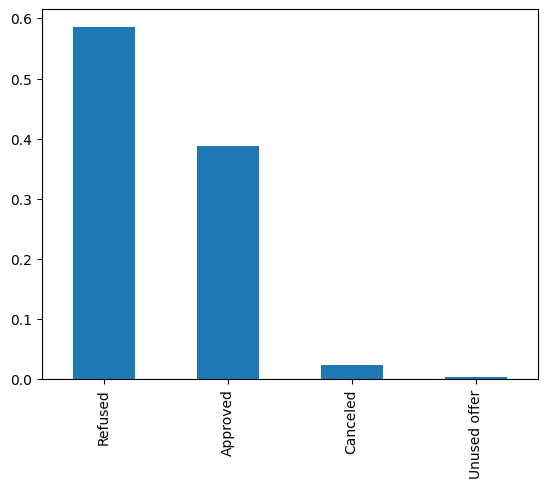

In [267]:
final.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()

**Education vs Offers**

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

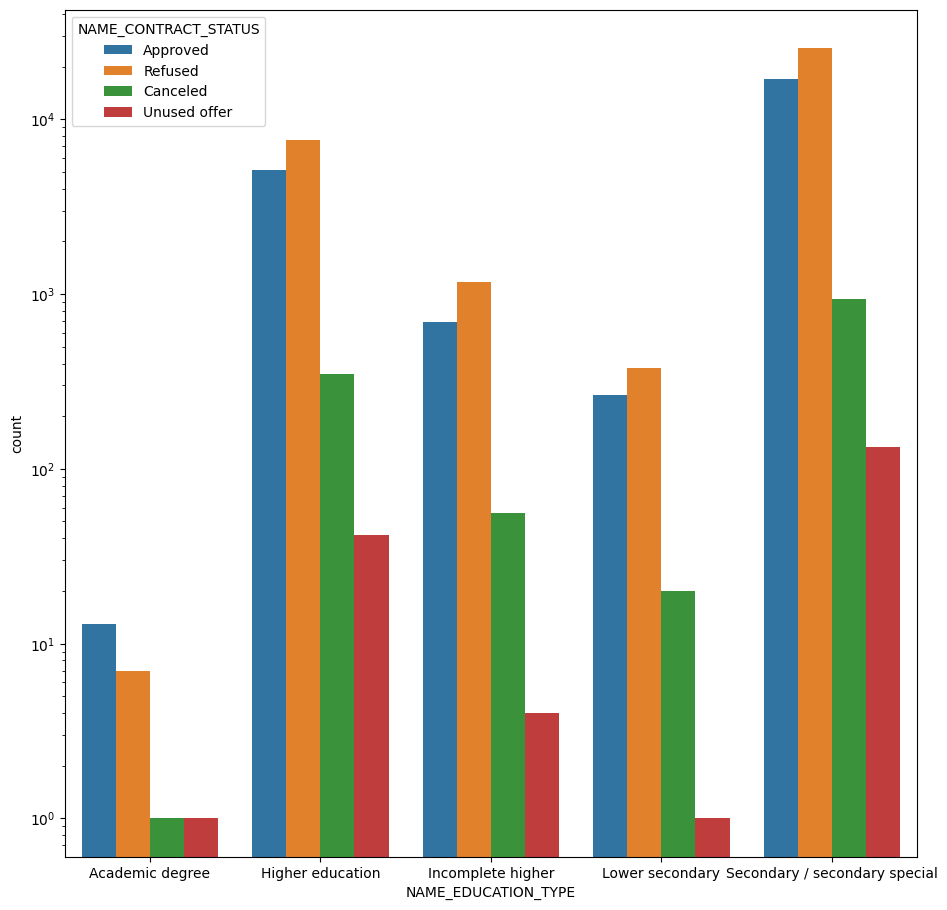

In [268]:
plt.figure(figsize=(11,11))
plt.yscale('log')
sns.countplot(data=final,x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS')

**Most of the offer which are rejected or acceped are by people with secondary school education**

**Purpose vs offer**

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

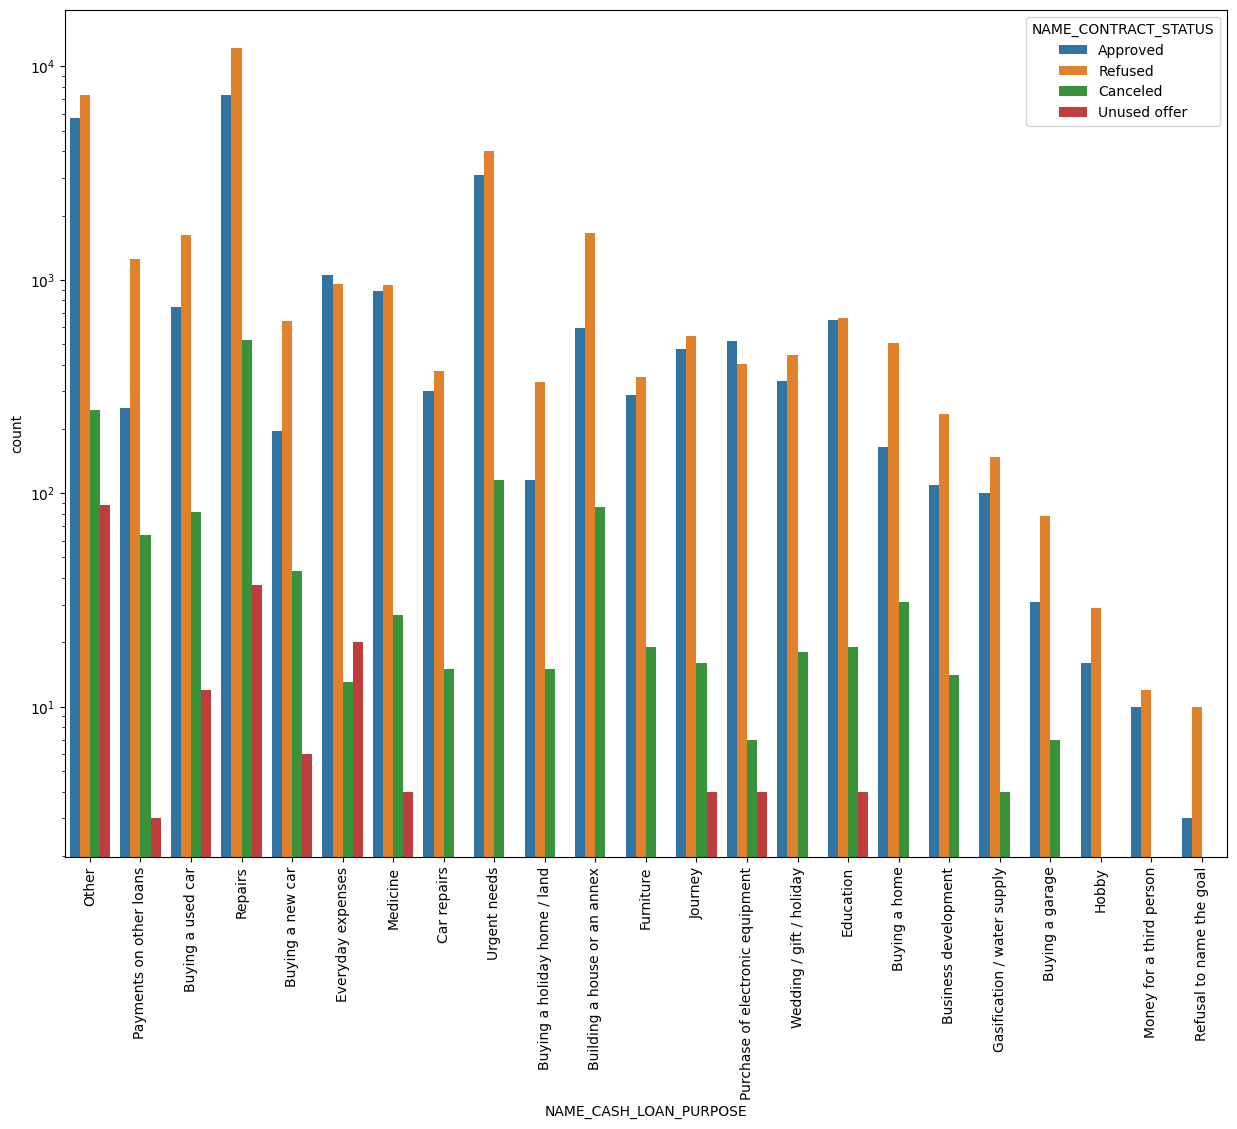

In [269]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')

**For repair most of the loans are given and most of the offers are reject**

**Property vs offer**

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

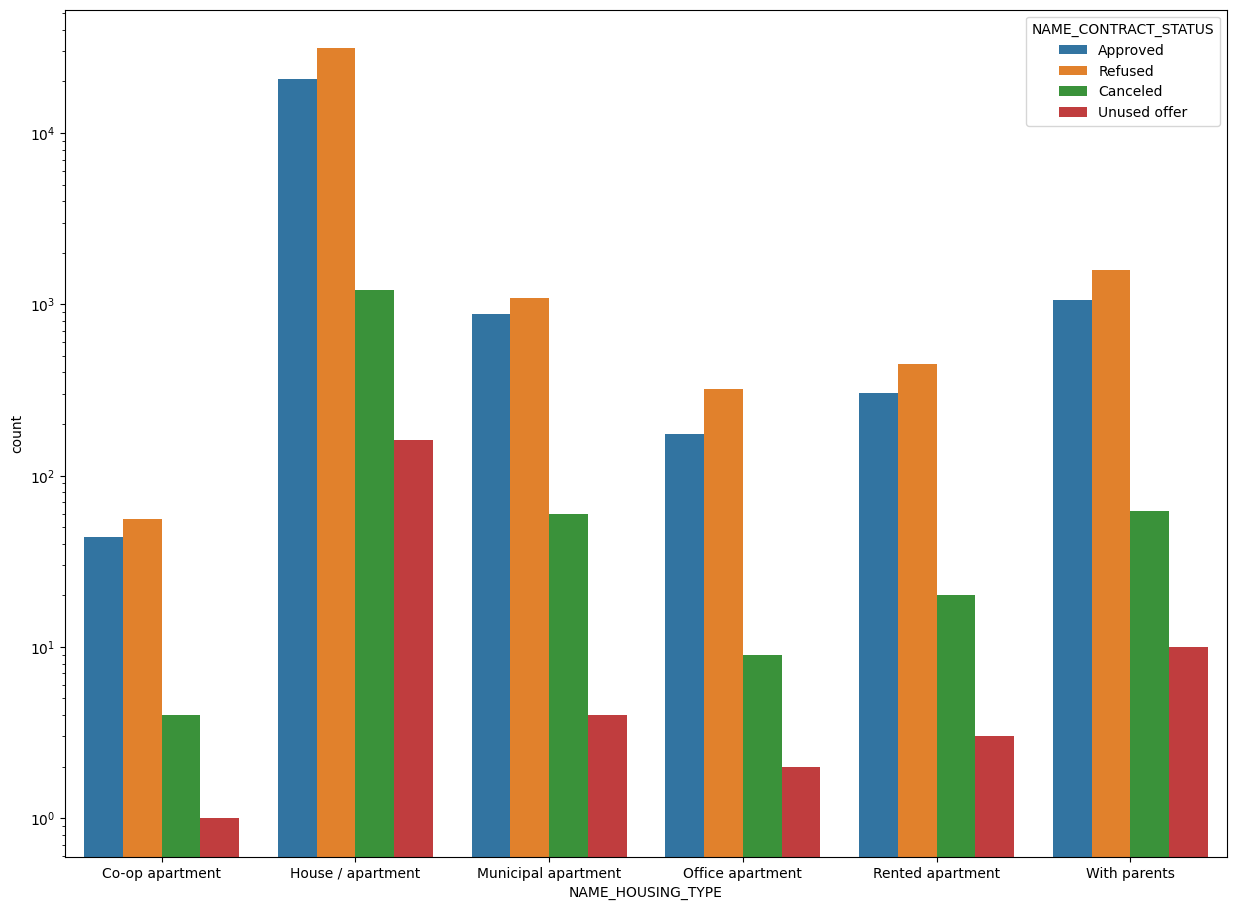

In [270]:
plt.figure(figsize=(15,11))
plt.yscale('log')
sns.countplot(data=final,x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

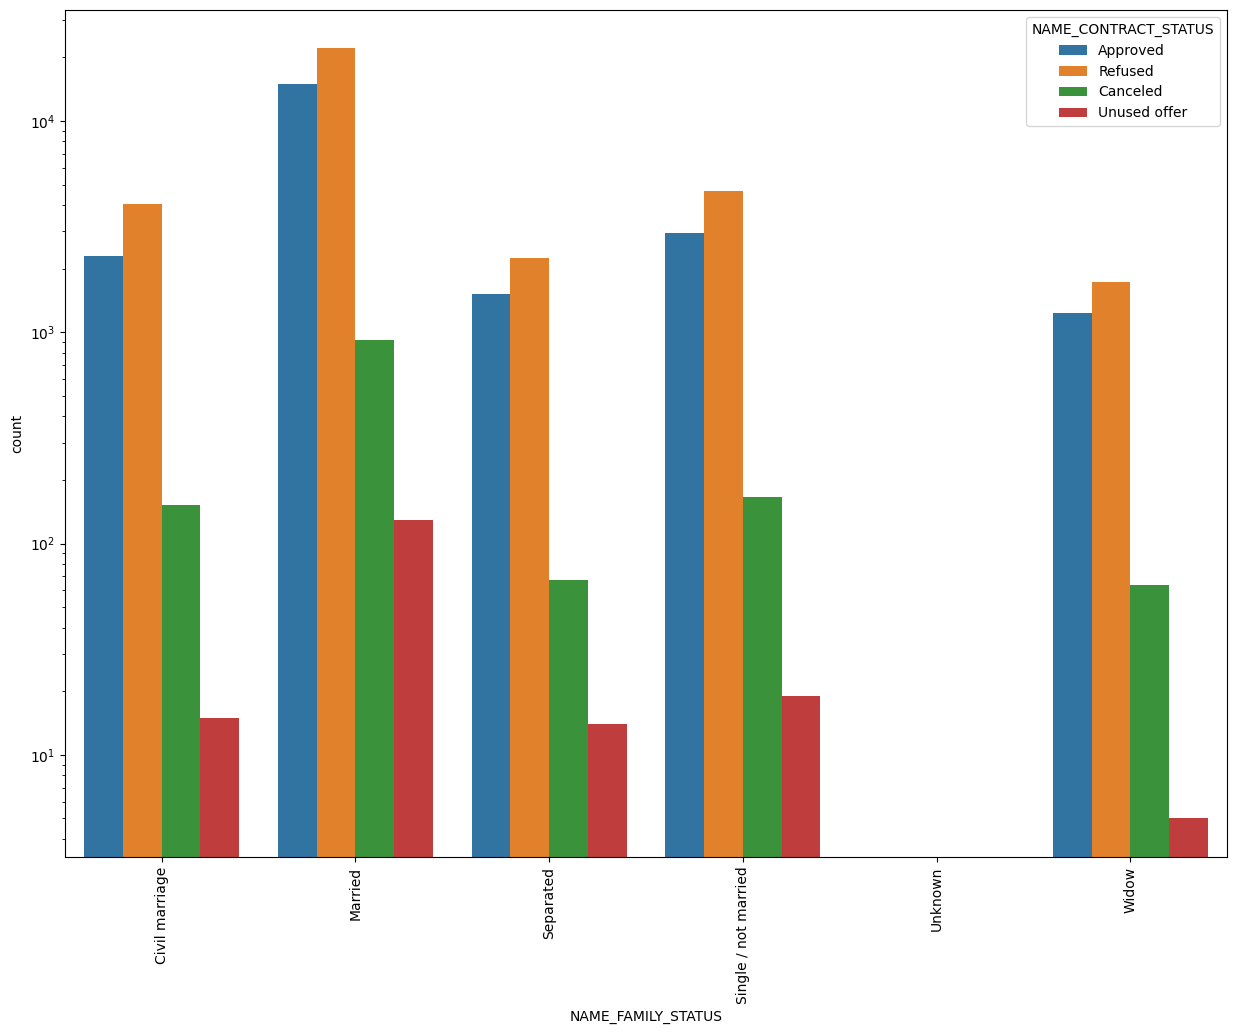

In [271]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='count'>

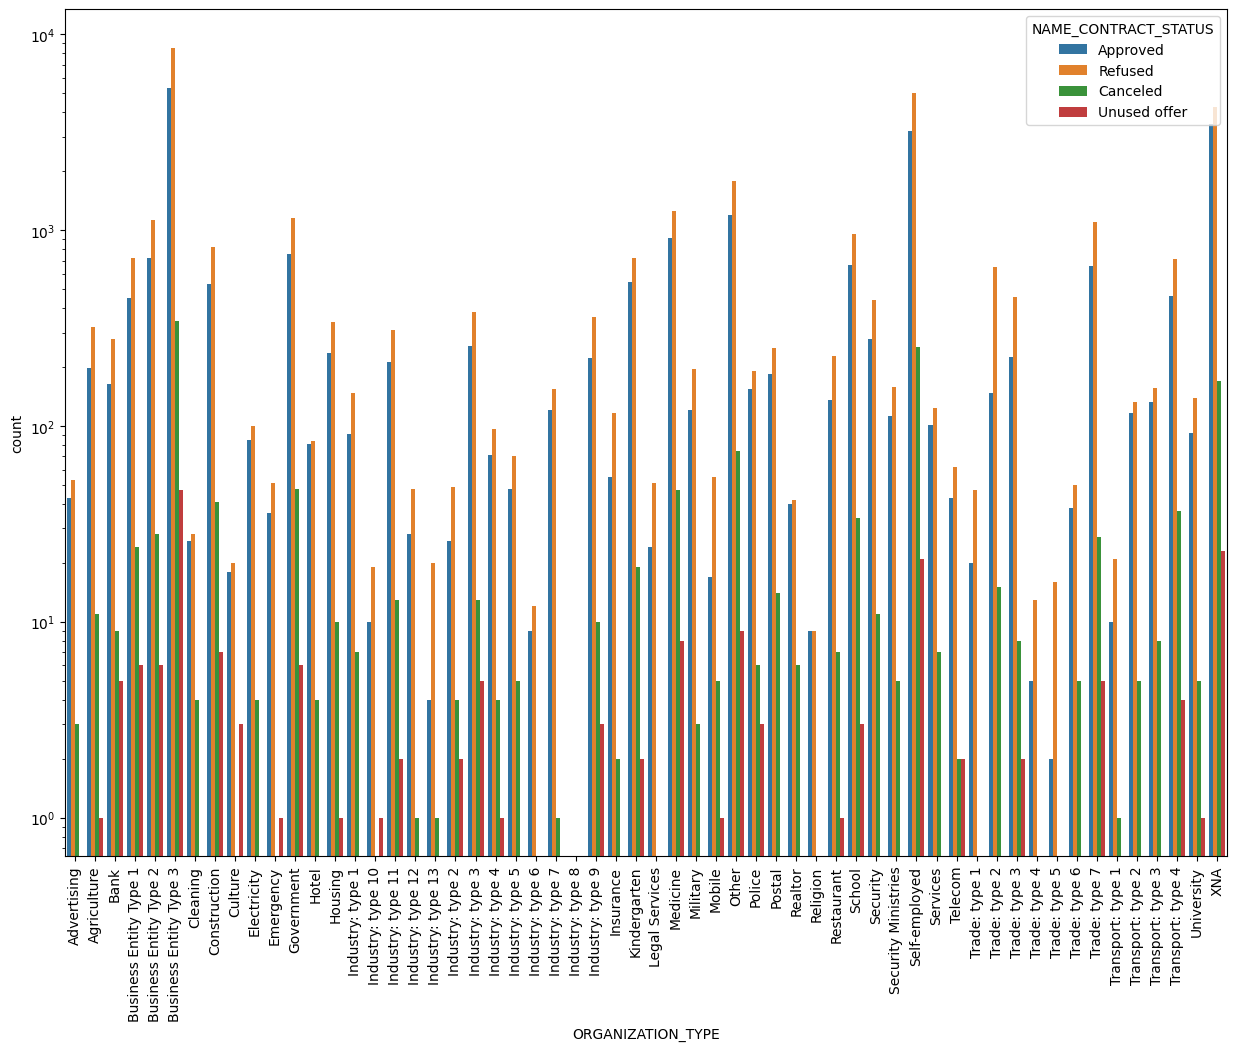

In [272]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='ORGANIZATION_TYPE',hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

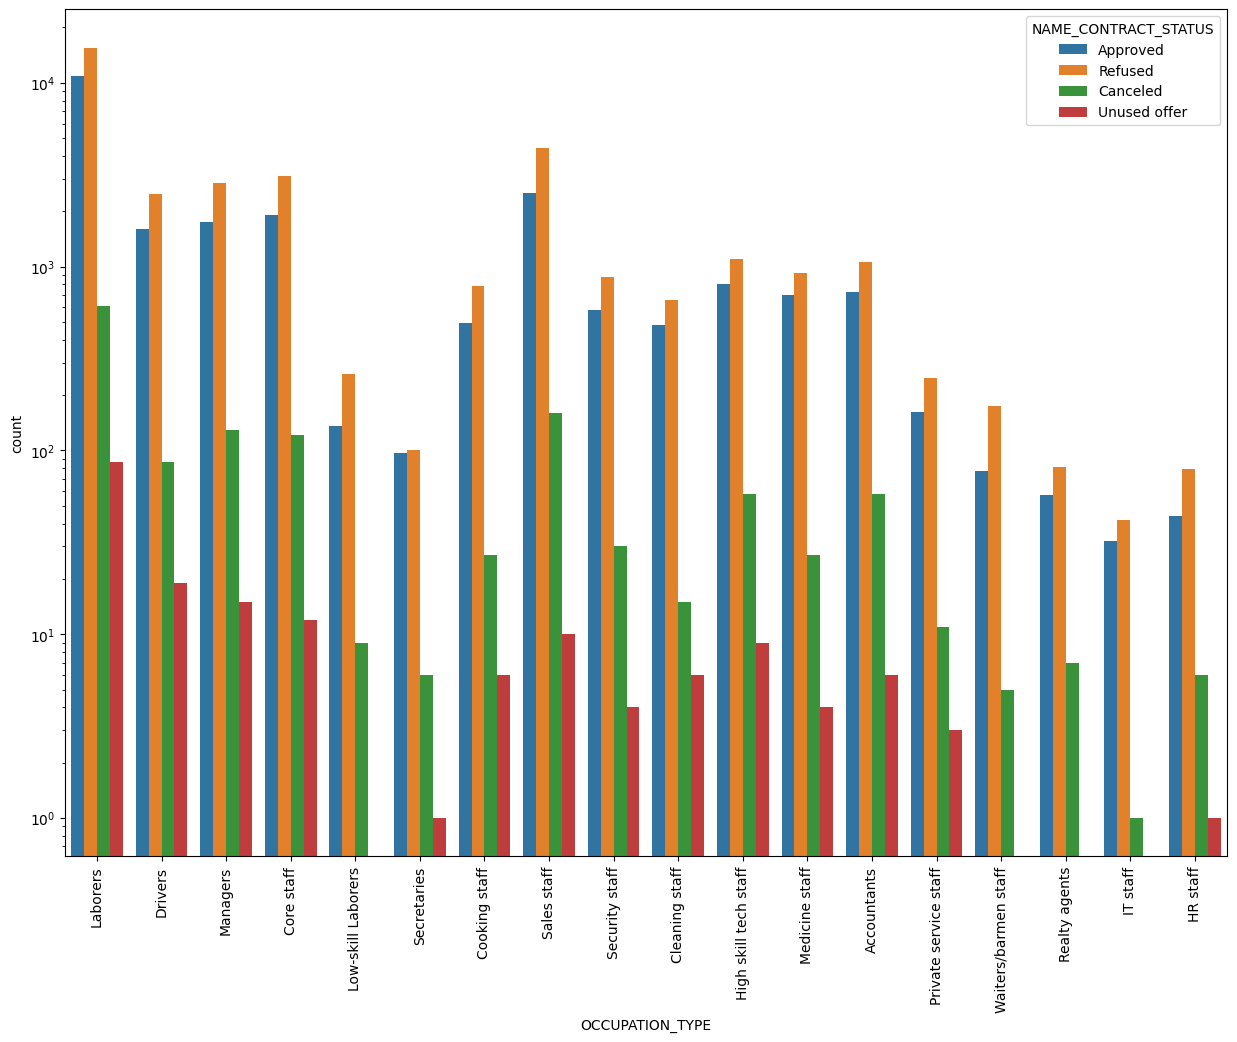

In [273]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS')

# Defaulters Conditions

* Cash loan takers are more likely to default a payment.
* Men are more defaulters than women.
* Parents with 6 kids and more are more phorone to become a defaulter.
* People who live in rented apartments or are living with their parents likely to   default a payment.
* People in the age group range 20-40 have higher probability of defaulting.
* A great number of people from region 3 are defaulting despite of their smaller     number.
* People given loan between 300k and 700k have high possibility to default.
* People who are unemployed or are on maternity leave have high chances to default   the payments.
* People with Lower secondary education have more chances to be a defaulter.
* People with civil marriage or single or separated are more likely to default.
* Low-skill Laborers ,drivers Waiters/barmen staff, Security staff, Laborers and     Cooking staff,sales staff are the highest categories to default.
* More the number of family members more one likely to default.
* Single people who are accompanied by the group of people in loan application are   likely to default more.
* Single low skilled labours and widowed HR staff are likely to default More
* Married unemployed are likely to default most.
* People living in co-op appartements and are separated are likely to default the   loan followed by separated and civil marriage living in rented appartements
* People living in region 3 and are single or having civil marriage are likely to   default .
* People living with their parents and having lower Sc education are  likely to     default followed by people haven't completed their higher education.
* If the salary is less than 500k more chances of defaulting chances for default.
* Organizations with highest percent of loans not repaid are Transport: type 3 ,     Industry: type 13 , Industry: type 8 and Restaurant.
* People with civil marriage and lower Sc education likely to default more           followed by lower Sc separated and single people .
* People living in region 3 and having lower Sc education are  likely to default     followed by people in the same region who haven't completed their higher           education.




---

finding highest co-related columns


---



In [274]:
pd.set_option('display.max_rows', None)

corr_matrix = final.corr()
print(corr_matrix['TARGET'].sort_values(ascending = False))

TARGET                        1.000000
DAYS_DECISION                 0.062546
FLAG_EMP_PHONE                0.045052
CNT_PAYMENT                   0.030597
CNT_CHILDREN                  0.027057
OBS_30_CNT_SOCIAL_CIRCLE      0.026385
OBS_60_CNT_SOCIAL_CIRCLE      0.026033
CNT_FAM_MEMBERS               0.025134
DEF_30_CNT_SOCIAL_CIRCLE      0.024855
DEF_60_CNT_SOCIAL_CIRCLE      0.021407
SELLERPLACE_AREA              0.020963
AMT_REQ_CREDIT_BUREAU_QRT     0.005273
AMT_REQ_CREDIT_BUREAU_DAY     0.004039
AMT_REQ_CREDIT_BUREAU_HOUR    0.000140
NFLAG_LAST_APPL_IN_DAY       -0.000147
AMT_REQ_CREDIT_BUREAU_WEEK   -0.003907
AMT_ANNUITY_x                -0.003952
SK_ID_PREV                   -0.004183
REG_REGION_NOT_LIVE_REGION   -0.004225
SK_ID_CURR                   -0.004828
AMT_REQ_CREDIT_BUREAU_YEAR   -0.014655
AMT_REQ_CREDIT_BUREAU_MON    -0.025648
AMT_CREDIT_y                 -0.025918
AMT_INCOME_TOTAL             -0.026314
AMT_CREDIT_x                 -0.027113
AMT_APPLICATION          




---


---
**Random Forest Algorithm**



---


---




we have used Random forest cause It’s a robust algorithm that can handle a large number of features and is less prone to overfitting.



In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# One-hot encode the data (convert categorical variables to dummy variables)
final_encoded = pd.get_dummies(final)

# Fill missing numeric values with the mean of the column
num_cols = final_encoded.select_dtypes(include=['float64', 'int64']).columns
final_encoded[num_cols] = final_encoded[num_cols].fillna(final_encoded[num_cols].mean())

# Select top N features with highest correlation
N = 10  # change this to select a different number of features
corr_matrix = final_encoded.corr()
top_N_pos_features = corr_matrix['TARGET'].sort_values(ascending=False).head(N+1).index
top_N_neg_features = corr_matrix['TARGET'].sort_values(ascending=True).head(N).index

# Now you can split your data and fit the model as before
X = final_encoded[top_N_pos_features].drop('TARGET', axis=1)
y = final_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8693306356432304




---


---

**K-means modelling**


---



---




In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report

# One-hot encode the data (convert categorical variables to dummy variables)
final_encoded = pd.get_dummies(final)

# Fill missing numeric values with the mean of the column
num_cols = final_encoded.select_dtypes(include=['float64', 'int64']).columns
final_encoded[num_cols] = final_encoded[num_cols].fillna(final_encoded[num_cols].mean())

# Select top N features with highest correlation
N = 10  # change this to select a different number of features
corr_matrix = final_encoded.corr()
top_N_pos_features = corr_matrix['TARGET'].sort_values(ascending=False).head(N+1).index
top_N_neg_features = corr_matrix['TARGET'].sort_values(ascending=True).head(N).index

# Now you can split your data and fit the model as before
X = final_encoded[top_N_pos_features].drop('TARGET', axis=1)
y = final_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse, '\t')

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10312     0]
 [ 1550     0]]
RMSE: 0.3614821770942096 	
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       0.00      0.00      0.00      1550

    accuracy                           0.87     11862
   macro avg       0.43      0.50      0.47     11862
weighted avg       0.76      0.87      0.81     11862

Accuracy: 0.8693306356432304




---



---
KNN Modelling


---



---




In [285]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# One-hot encode the data (convert categorical variables to dummy variables)
final_encoded = pd.get_dummies(final)

# Fill missing numeric values with the mean of the column
num_cols = final_encoded.select_dtypes(include=['float64', 'int64']).columns
final_encoded[num_cols] = final_encoded[num_cols].fillna(final_encoded[num_cols].mean())

# Select top N features with highest correlation
N = 10  # change this to select a different number of features
corr_matrix = final_encoded.corr()
top_N_features = corr_matrix['TARGET'].apply(abs).sort_values(ascending=False).head(N+1).index

# Now you can split your data and fit the model as before
X = final_encoded[top_N_features].drop('TARGET', axis=1)
y = final_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8737986848760748


Here the RMSE value is compared and the Accuracy is compared between 3 Algorithms

1.Random Forest

2.K-Means

3.KNN

so here the The KNN Algorithm is best cause it have more accuracy and less RMSE value than other two algorithms so the KNN Algorithm will be best

#Problem Statement 2



---



---

**Predictive Modeling**:
Model Development: Build a model to predict credit risk using statistical or machine learning techniques.
Model Validation and Optimization: Validate and optimize the model for accuracy and reliability.


---


**Risk Minimization Strategy**:
Risk Assessment: Evaluate and quantify the risk associated with each loan applicant using the model.
Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans.


---






---


---
**Random Forest Algorithm**

we have used Random forest cause It’s a robust algorithm that can handle a large number of features and is less prone to overfitting.




In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# One-hot encode the data (convert categorical variables to dummy variables)
final_encoded = pd.get_dummies(final)

# Fill missing numeric values with the mean of the column
num_cols = final_encoded.select_dtypes(include=['float64', 'int64']).columns
final_encoded[num_cols] = final_encoded[num_cols].fillna(final_encoded[num_cols].median())

# Select top N features with highest correlation
N = 10  # change this to select a different number of features
corr_matrix = final_encoded.corr()
top_N_features = corr_matrix['TARGET'].apply(abs).sort_values(ascending=False).head(N+1).index

# Now you can split your data and fit the model as before
X = final_encoded[top_N_features].drop('TARGET', axis=1)
y = final_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))




Confusion Matrix:
[[10312     0]
 [ 1550     0]]
RMSE: 0.3614821770942096 	
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       0.00      0.00      0.00      1550

    accuracy                           0.87     11862
   macro avg       0.43      0.50      0.47     11862
weighted avg       0.76      0.87      0.81     11862

Accuracy: 0.8693306356432304




---



---

Naive Bayse Algorithm


---



---



In [291]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# One-hot encode the data (convert categorical variables to dummy variables)
final_encoded = pd.get_dummies(final)

# Fill missing numeric values with the median of the column
num_cols = final_encoded.select_dtypes(include=['float64', 'int64']).columns
final_encoded[num_cols] = final_encoded[num_cols].fillna(final_encoded[num_cols].median())

# Select top N features with highest correlation
N = 10  # change this to select a different number of features
corr_matrix = final_encoded.corr()
top_N_pos_features = corr_matrix['TARGET'].sort_values(ascending=False).head(N+1).index
top_N_neg_features = corr_matrix['TARGET'].sort_values(ascending=True).head(N).index

# Now you can split your data and fit the model as before
X = final_encoded[top_N_features].drop('TARGET', axis=1)
y = final_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes Classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse, '\t')

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[9397  915]
 [1309  241]]
RMSE: 0.433000533657911 	
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     10312
           1       0.21      0.16      0.18      1550

    accuracy                           0.81     11862
   macro avg       0.54      0.53      0.54     11862
weighted avg       0.79      0.81      0.80     11862

Accuracy: 0.8125105378519643


Here we have compared two algorithms with RMSE value and Accuracy

1.Random forest

2.Naive Bayse

so the conclusion I get when compred two algorithms is that Random forest algorithms is best cause it have less RMSE value and high accuracy when compared to Naive Bayse Algorithm